In [19]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import matplotlib.gridspec as gridspec
import spectral_analysis as sa
from scipy.special import erf
import datafidelity as df

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95)) and source != 'swift_uv'",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and source != 'swift_uv'",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25)) and source != 'swift_uv' and Supernovae.SN not in ('2006x', '2008ia')",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42)) and source != 'swift_uv'",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7)) and source != 'swift_uv'",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7)) and source != 'swift_uv'"]
# query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source < .95 or dm15_from_fits < .95)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25)) and source != 'swift_uv' and Supernovae.SN not in ('2006x', '2008ia')",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7)) and source != 'swift_uv'"]
# query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and (dm15_cfa < .9 or dm15_from_fits < .9)",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= .9 and dm15_cfa < 1.) or (dm15_from_fits >= .9 and dm15_from_fits < 1))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1 and dm15_cfa < 1.05) or (dm15_from_fits >= 1 and dm15_from_fits < 1.05))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.05 and dm15_cfa < 1.1) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.1))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.1 and dm15_cfa < 1.2) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.2))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.2 and dm15_cfa < 1.3) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.3))", 
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.3 and dm15_cfa < 1.4) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.4))", 
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.4 and dm15_cfa < 1.6) or (dm15_from_fits >= 1.4 and dm15_from_fits < 1.6))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and (dm15_cfa >= 1.6 or dm15_from_fits >= 1.6)"]

In [22]:
comps_dm15_max_fewer_bins_med, sn_arrays_med, boot_sn_arrays_med = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=2, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95)) and source != 'swift_uv'
172 questionable files currently ignored
1 questionable spectra removed 78 spectra left
0 Peculiar Ias removed 78 spectra left
76 spectra with host corrections
172 questionable files currently ignored
28 valid SNe found
Arrays cleaned
28 spectra may have telluric contamination
28 SNs with host corrections
Creating composite...
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and source != 'swift_uv'
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004dt-20040820-hst.flm', u'sn2005cf-20050611-hst.flm', u'sn2005cf-20050

In [23]:
SN = sn_arrays_med[0][0]
print np.median(SN.ivar[SN.x1:SN.x2])

47294.1305703


In [24]:
# comps_dm15_max_fewer_bins_mean, sn_arrays_mean, boot_sn_arrays_mean = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=1)
comps_dm15_max_fewer_bins_mean, sn_arrays_mean, boot_sn_arrays_mean = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=1, selection='max_coverage', gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95)) and source != 'swift_uv'
172 questionable files currently ignored
1 questionable spectra removed 78 spectra left
0 Peculiar Ias removed 78 spectra left
76 spectra with host corrections
172 questionable files currently ignored
28 valid SNe found
Arrays cleaned
28 spectra may have telluric contamination
28 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and source != 'swift_uv'
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004dt-20040820-hst.flm', 

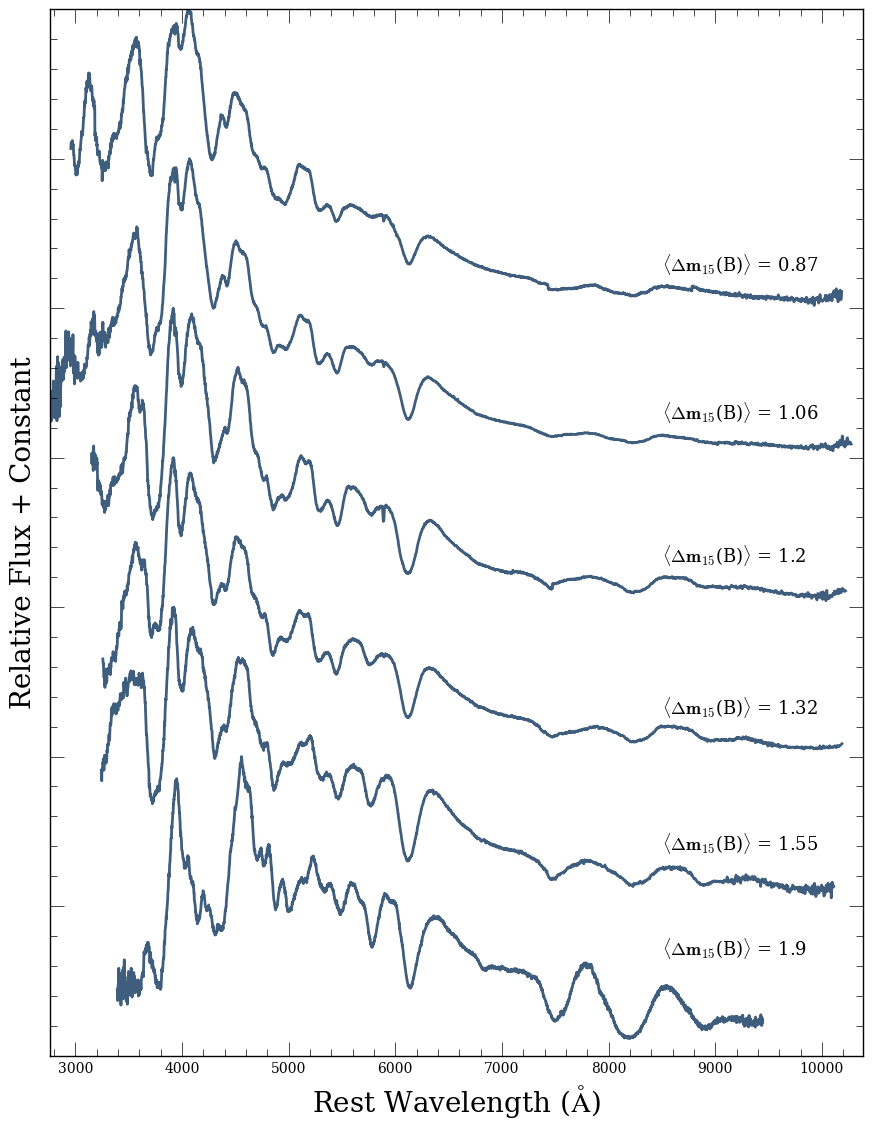

In [25]:
query_db.set_min_num_spec(comps_dm15_max_fewer_bins_mean, 5)
query_db.stacked_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/dm15_split_max')
# query_db.stacked_plot(comps_dm15_max_fewer_bins_mean)

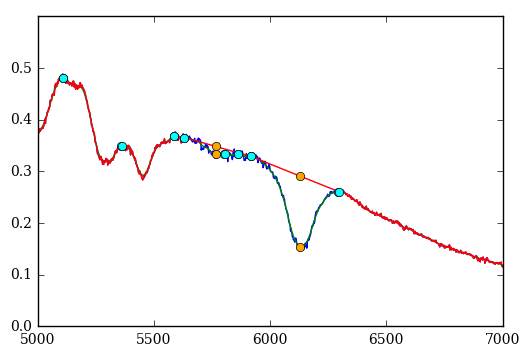

0.89 0.114260614822


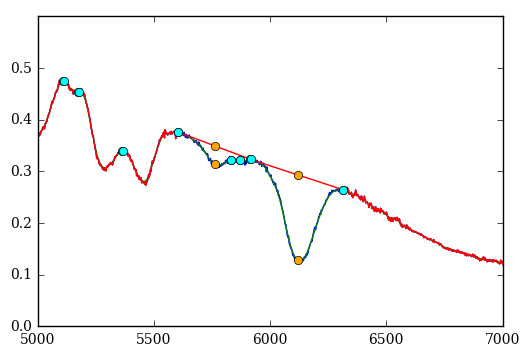

1.07 0.213644405662


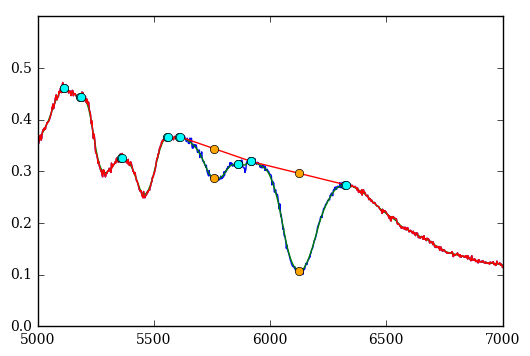

1.2 0.301356772484


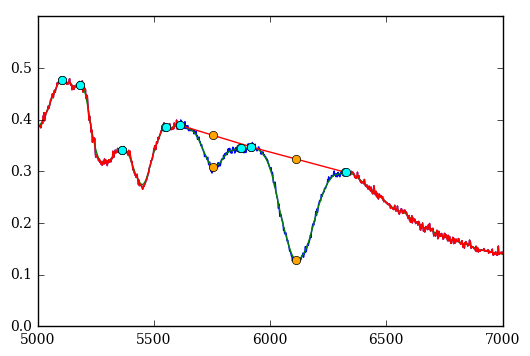

1.32 0.318493219381


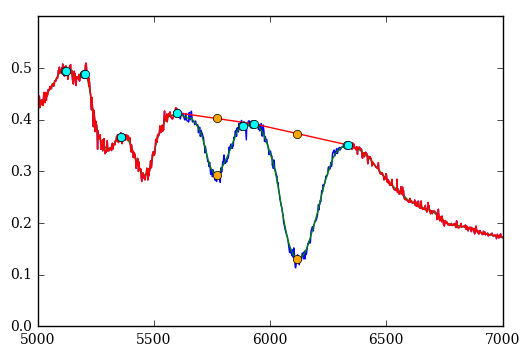

1.56 0.448465713053


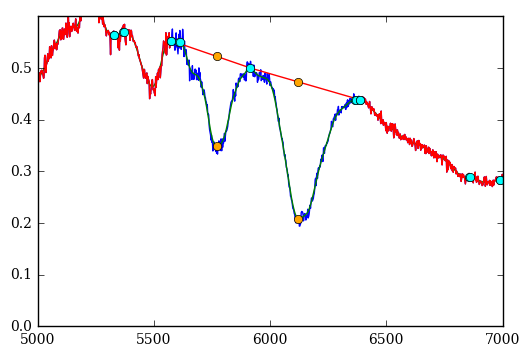

1.89 0.656044433248


In [26]:
si_ratios_med = []
phases_med = []
dm15s_med = []
for comp in comps_dm15_max_fewer_bins_med:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.002, dm15=dm15)
    print dm15, r
    phases_med.append(p)
    dm15s_med.append(dm15)
    si_ratios_med.append(r)

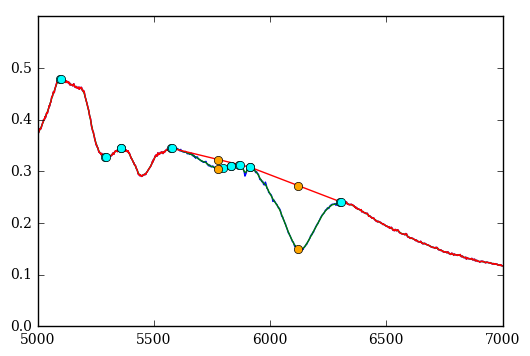

0.87 0.142317996542


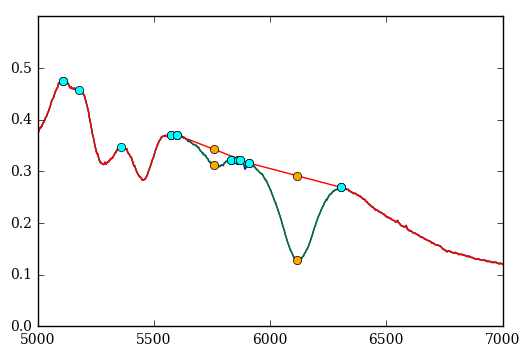

1.06 0.182532553174


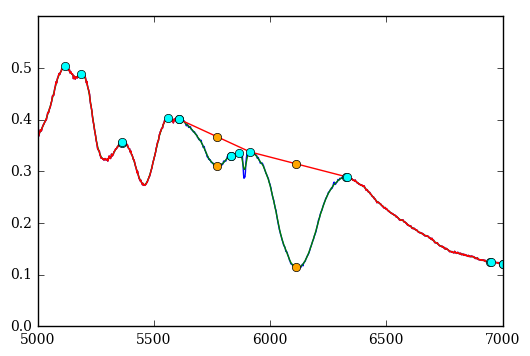

1.2 0.284342254498


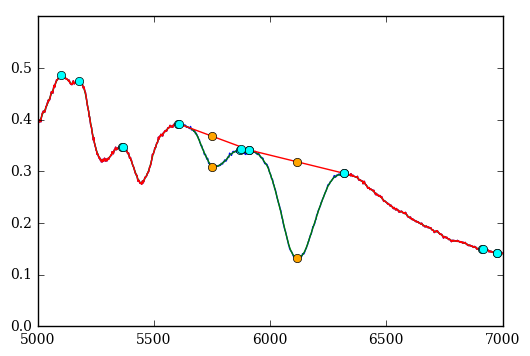

1.32 0.317863416072


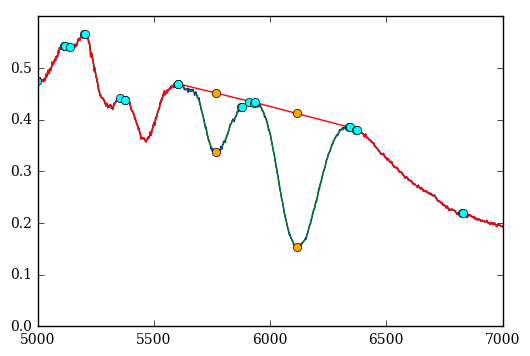

1.55 0.439481556131


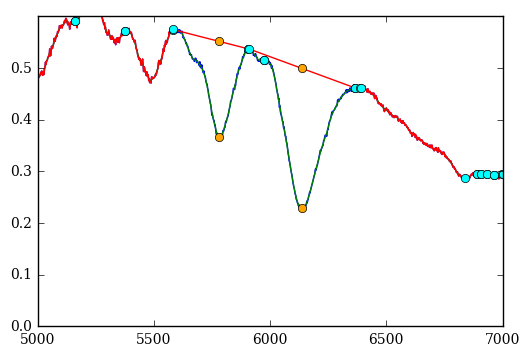

1.9 0.685717598114


In [27]:
si_ratios_mean = []
phases_mean = []
dm15s_mean = []
for comp in comps_dm15_max_fewer_bins_mean:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, dm15=dm15)
    print dm15, r
    phases_mean.append(p)
    dm15s_mean.append(dm15)
    si_ratios_mean.append(r)

In [28]:
boot_ratios_med = []
errors_med  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_med)):
    rs = []
    print k
    for comp in boot_sn_arrays_med[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.002, plot=False)
        rs.append(r)
    boot_ratios_med.append(rs)

0
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
2
3
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Co

In [29]:
boot_ratios_mean = []
errors_mean  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_mean)):
    rs = []
    print k
    for comp in boot_sn_arrays_mean[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        rs.append(r)
    boot_ratios_mean.append(rs)

0
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
2
3
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Co

In [30]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_med = np.asarray(boot_ratios_med)
for j in range(len(boot_ratios_med)):
    r_resids = []
    r_resids.append(boot_ratios_med[j] - si_ratios_med[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_med = [low_errors, up_errors]

In [31]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_mean = np.asarray(boot_ratios_mean)
for j in range(len(boot_ratios_mean)):
    r_resids = []
    r_resids.append(boot_ratios_mean[j] - si_ratios_mean[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_mean = [low_errors, up_errors]

0
0.115225612949 47294.1305703


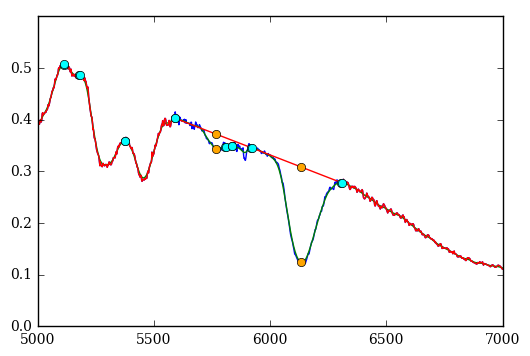

sn1994s-19940616-uoi.flm 0.94 0.152188124175 Check:  0.002 42.1017919054 34.8321198485
0.168308990521 13038.719034


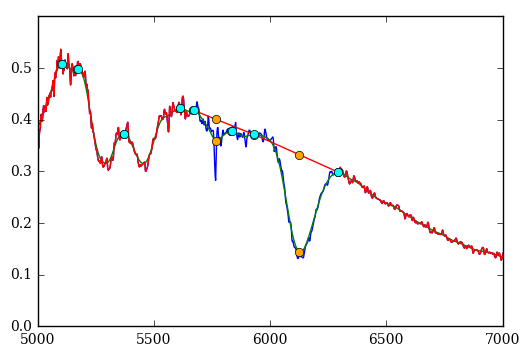

sn2001cp-20010629-ui.flm 0.88 0.220170450241 Check:  0.003 25.8994828348 23.7501402626
0.180030868452 43410.7818164


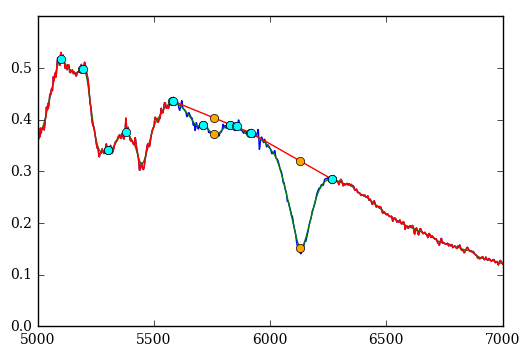

sn2001eh-20010920-ui.flm 0.92 0.187837681295 Check:  0.002 40.3523306269 38.447282377
0.120250498957 80625.8080489


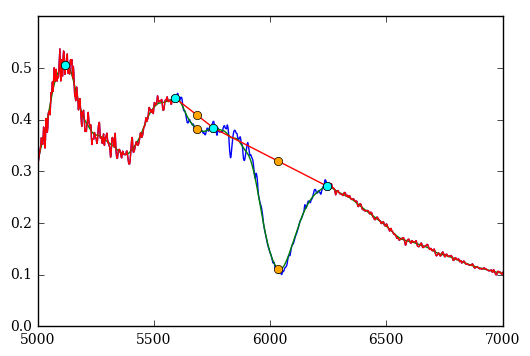

sn2002cd-20020420-ui-corrected.flm 0.84 0.127837269437 Check:  0.003 27.5989214926 25.7022215808
0.130034362091 54931.4290957


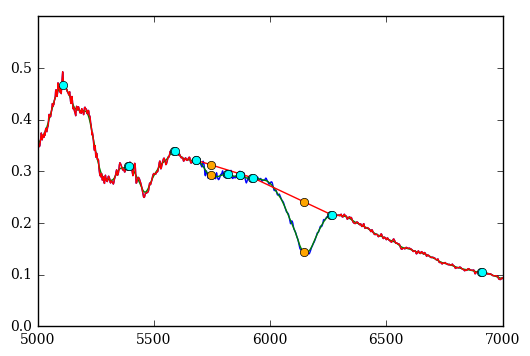

sn2005eq-20051011.376-ui-corrected.flm 0.88 0.209846664919 Check:  0.002 40.6050100926 39.5694055064
0.155127836469 3839.78293934


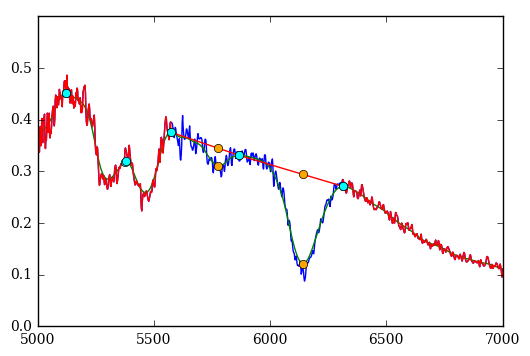

sn2006cq-20060605.307-ui.flm 0.938834805412 0.19680433604 Check:  0.004 13.1588709961 10.9565777676
0.193065942513 57698.4659271


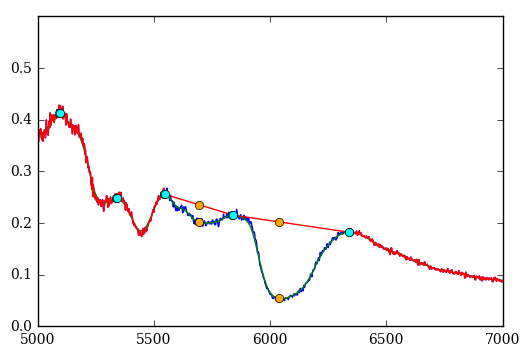

sn2006ot-20061123.362-br.flm 0.84 0.229382613826 Check:  0.003 37.1051906457 37.8918352052
0.159744286334 7057.99399329


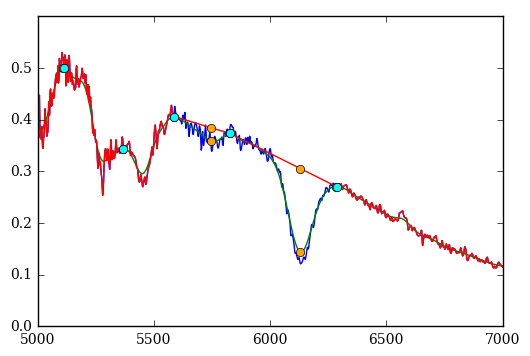

sn2006s-20060206.517-ui.flm 0.93 0.154424777606 Check:  0.004 16.7311651418 14.1443147205
0.395597663439 5805.42511926


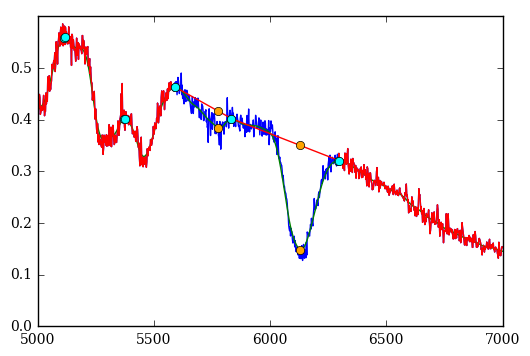

sn1996C-19960217.48-fast.flm 0.93 0.162627985708 Check:  0.003 25.6361006969 27.3447953372
0.369883585904 10101.4202203


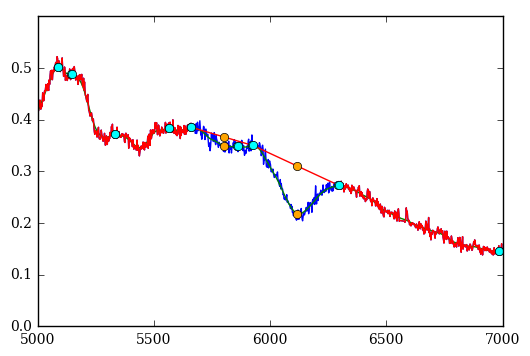

sn1999gp-20000105.10-fast.flm 0.87 0.188756540618 Check:  0.003 32.5859833351 33.6898092142
0.314179804544 135814.301173


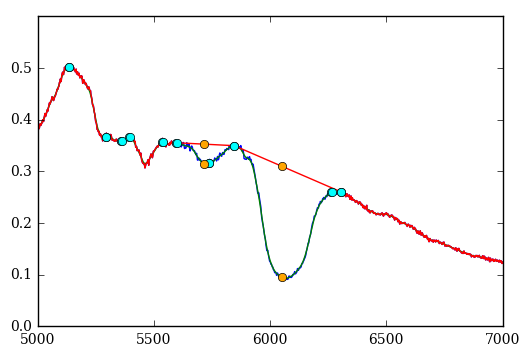

sn2001ay-20010426.41-mmt.flm 0.68 0.177428578819 Check:  0.0015 92.4549843865 95.381385481
0.370124327152 8720.7701631


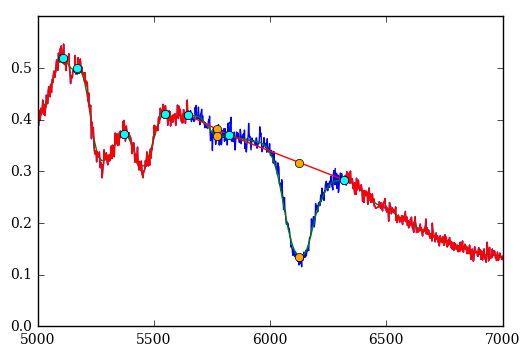

sn2002jy-20021226.12-fast.flm 0.88 0.0739330422885 Check:  0.003 29.3658455292 31.1657537787
0.347681108873 5250.23647943


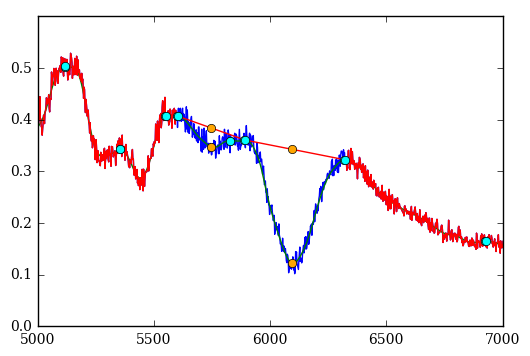

sn2004as-20040319.28-fast.flm 0.92 0.166825286697 Check:  0.003 24.491459393 25.3709021264
0.280675579365 14393.6897387


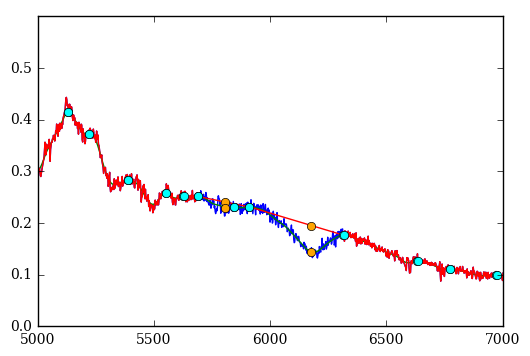

sn2005M-20050202.34-fast.flm 0.87 0.217102282651 Check:  0.003 30.2299833192 31.6856249275
0.409651428479 807.85911149


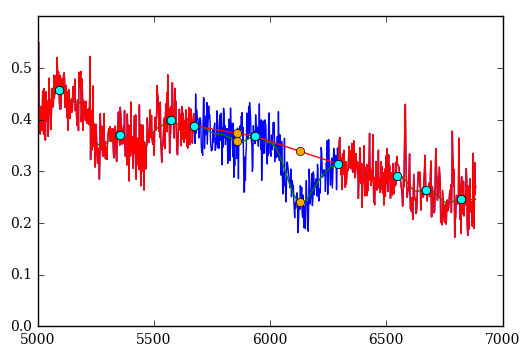

sn2006cj-20060522.29-fast.flm 0.81 0.156921329559 Check:  0.004 10.4608862356 11.1533728453
0.304674230698 2158.99685932
Could not find maximum in a specified range!
sn2006gr-20061002.26-fast.flm 0.81 nan Check:  0.004 13.1855877904 13.8208014383
0.356743670331 1355.79999999


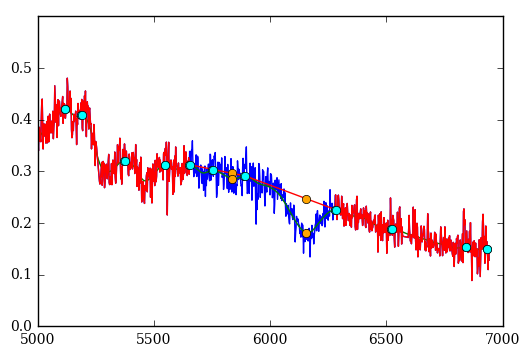

sn2006oa-20061125.08-fast.flm 0.89 0.164836112709 Check:  0.004 12.0325490819 12.6156923403
0.168320449682 10370.4647583


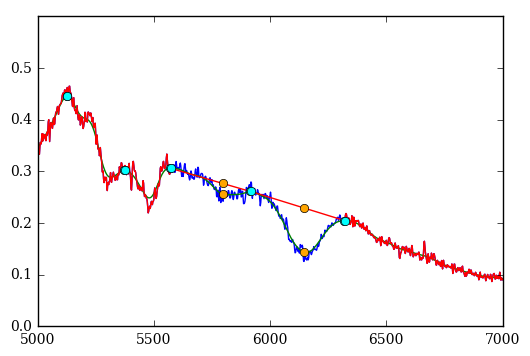

SN07ai_070314_b01_DUP_BC.dat 0.852109516951 0.244401714146 Check:  0.004 18.837575125 20.0883943654
0.157407559832 56445.5110267


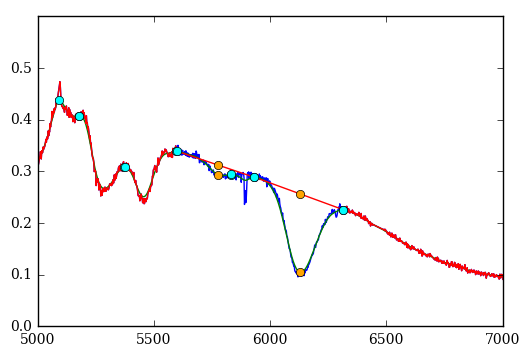

SN07ca_070508_b01_BAA_IM.dat 0.89 0.123813725588 Check:  0.003 34.3085599945 32.9253573263
0.0902839541091 426.49927891
Could not find maximum in a specified range!
sn1990n-19900709.730-iue.flm 0.943599627942 nan Check:  0.0045 4.58780441426 2.21678966512
0.137962141105 638.037100064
Could not find maximum in a specified range!
sn1991t-19910427.424-iue.flm 0.898541050009 nan Check:  0.004 7.66166464793 5.0578381885
0.43394364001 34080.2147663
Could not find maximum in a specified range!
sn2012cg-visit1-hst.flm 0.86 nan Check:  0.0015 84.0869883656 93.4185750256
0.149187123015 29524.1780837


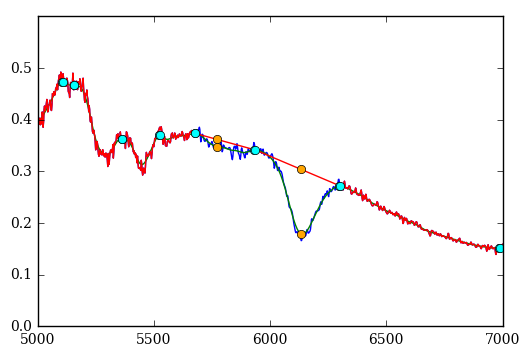

sn2013dy-visit2-hst.flm 0.92 0.113442803049 Check:  0.003 29.3911488923 27.4637639884
1
0.153881439114 713826.390089


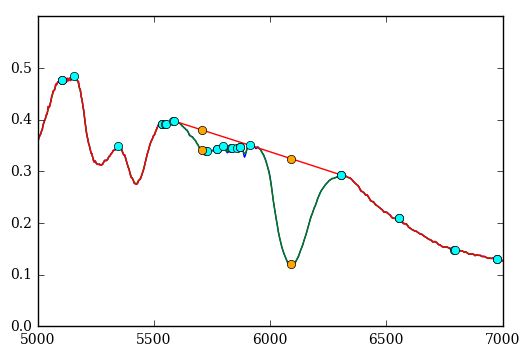

sn1998dk-19980831-ui.flm 1.05 0.193155616993 Check:  0.001 151.885830348 138.561375893
0.150025524523 30017.8316578


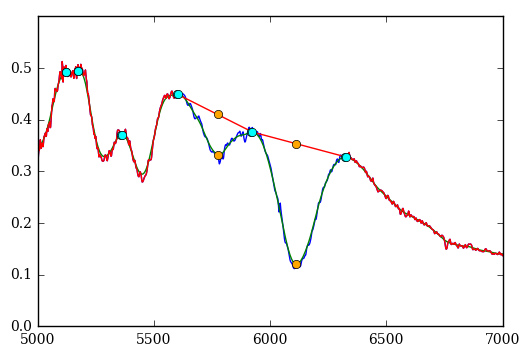

sn2001da-20010716-ui-corrected.flm 1.12 0.333341941158 Check:  0.003 35.3326830058 31.2742199204
0.13592787422 441964.106325


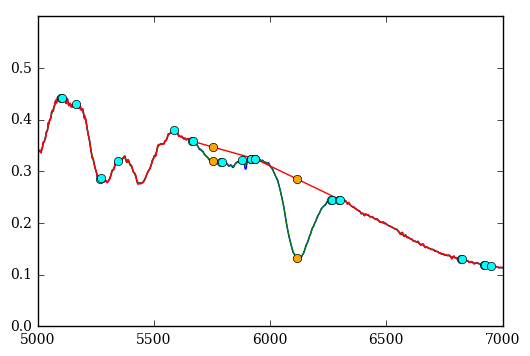

sn2001fe-20011115-ui.flm 1.0 0.182431502776 Check:  0.001 107.58803315 97.0469826578
0.122855248296 72793.1018751


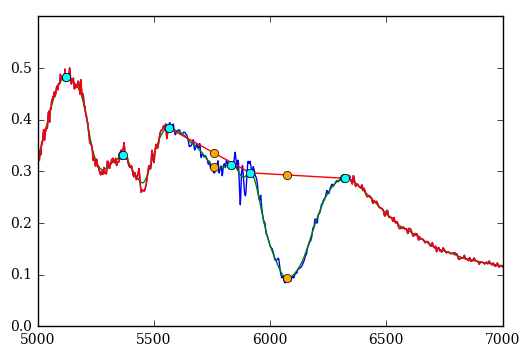

sn2002bo-20020322-ui-corrected.flm 1.08 0.135698468154 Check:  0.003 30.6167572038 28.4486821751
0.139059145328 2104.44137178


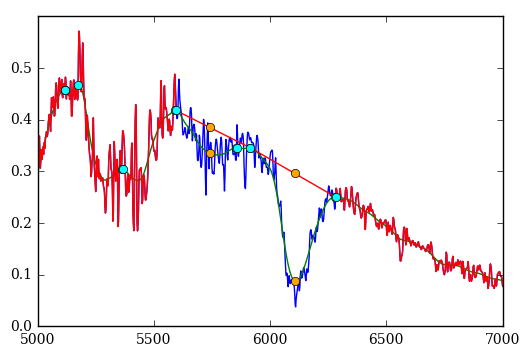

sn2002de-20020608.374-ui-corrected.flm 0.96 0.24207144734 Check:  0.004 9.45655772761 7.45799112642
0.141919570999 229543.800451


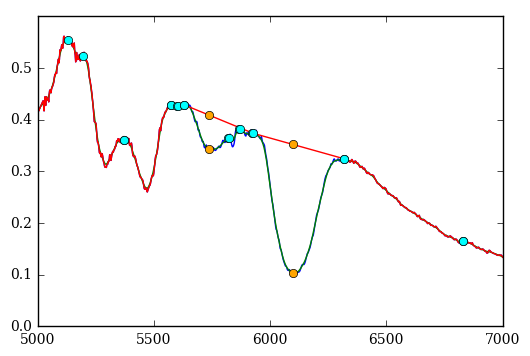

sn2004fu-20041119-ui.flm 1.08 0.260888624056 Check:  0.0015 64.3413758165 60.0448394656
0.262795384596 1561.62264882


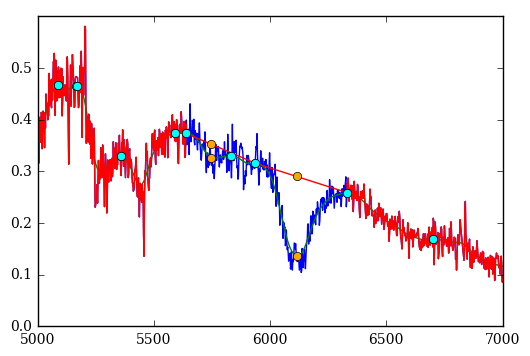

sn2005ag-20050212.596-br.flm 1.04651897756 0.167261274562 Check:  0.004 9.95077316601 10.0568173759
0.1762360427 24196.8499061


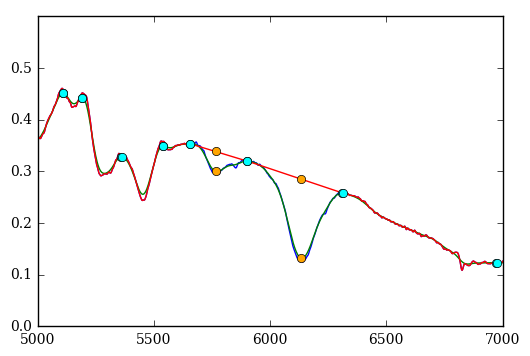

sn2005cf-20050610.7-uvot.flm 1.1 0.252245818206 Check:  0.003 38.7814633598 20.184419275
0.155407488468 5319.55044979


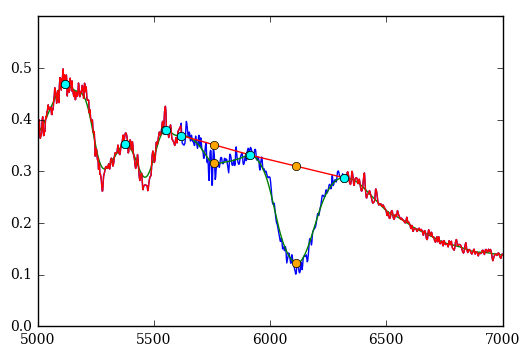

sn2005ms-20060106.400-ui.flm 1.02142208206 0.191442071692 Check:  0.004 17.0587091046 16.0601089496
0.120213382537 15722.1452581


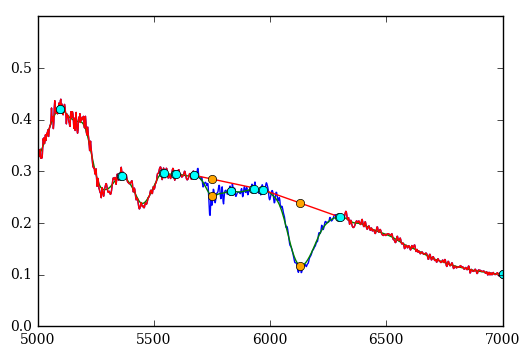

sn2005na-20060105.335-ui.flm 1.09 0.272893437067 Check:  0.003 23.9089174453 23.9644295065
0.158334708656 15269.0011633
Could not find maximum in a specified range!
sn2006or-20061201.530-ui.flm 1.06267601692 nan Check:  0.003 22.1273636649 19.6380646157
0.222093722812 392399.75256


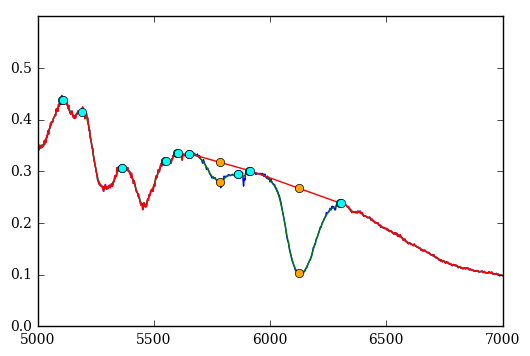

sn2007a-20070113.208-br.flm 0.95 0.235772430824 Check:  0.0015 93.1192082884 88.4635234241
0.141111872004 409172.899302


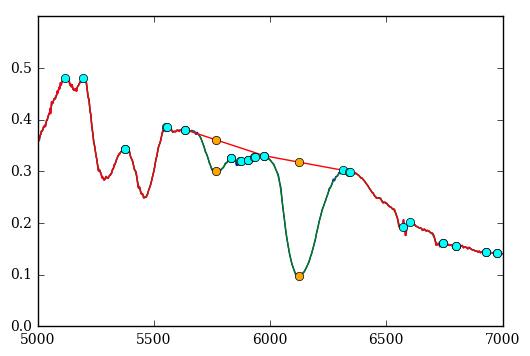

sn2007af-20070313.545-ui-corrected.flm 1.04 0.278588523084 Check:  0.001 115.813808468 109.415516387
0.157835100759 18735.9215653


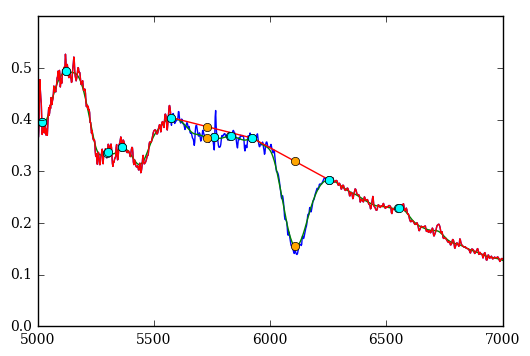

sn2007bz-20070426.419-ui.flm 1.05 0.13112715422 Check:  0.003 23.9661167489 23.6312175845
0.147642551278 120111.346593


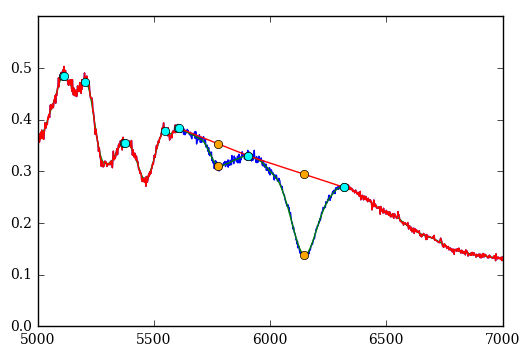

sn2007o-20070122.663-deimos.flm 1.13613975141 0.272816635553 Check:  0.002 48.1970926927 46.2065791613
0.360246008799 196810.710739


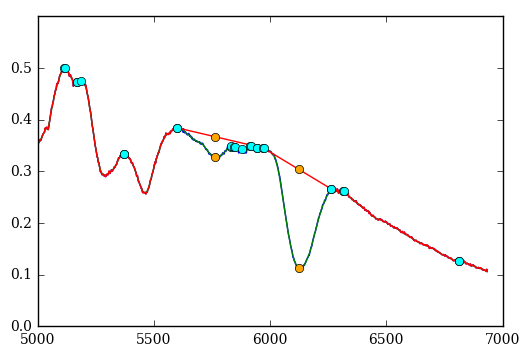

sn1994ae-19941201.50-fast.flm 0.96 0.210851792755 Check:  0.001 139.872295829 150.136503177
0.405777638131 172.800948006


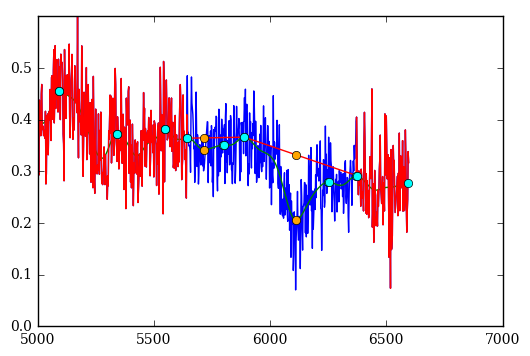

sn1996ab-19960522.37-fast.flm 1.01 0.180826946544 Check:  0.0045 4.98363684224 5.14521199227
0.361035016818 3770.93697104


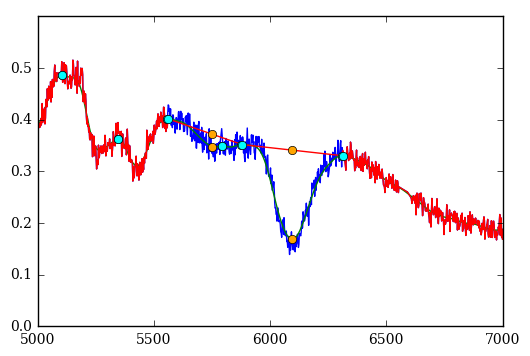

sn1996bl-19961018.18-fast.flm 1.07 0.138322567864 Check:  0.004 19.1778200471 19.5586070891
0.308773325527 44689.3788757


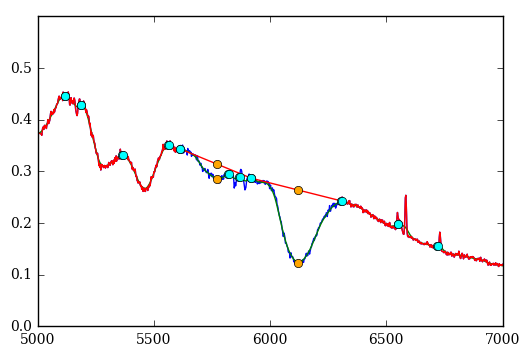

sn1997dt-19971204.11-fast.flm 1.04 0.205837973275 Check:  0.002 56.0487123013 56.96654751
0.321555758295 283374.165178


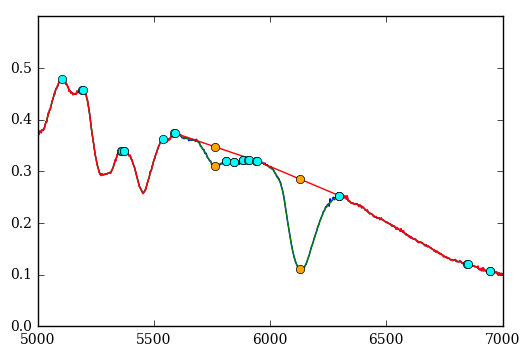

sn1998aq-19980429.26-fast.flm 1.11 0.212256748404 Check:  0.001 150.676935948 161.399514987
0.319560660875 228918.425751


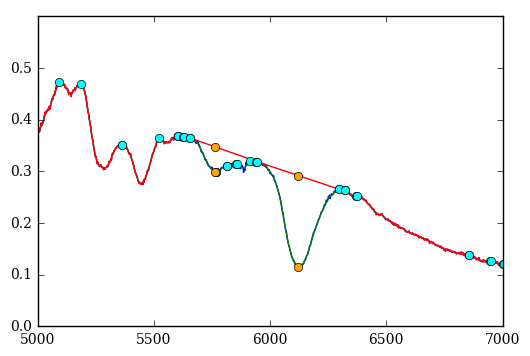

sn1998bu-19980517.15-fast.flm 1.03 0.277451446176 Check:  0.001 134.319674337 137.204085026
0.344655402001 6817.49232497


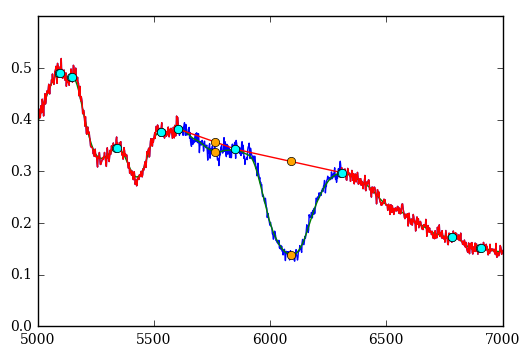

sn1998ec-19980930.50-fast.flm 1.08 0.104923823014 Check:  0.003 24.3551668949 25.4556344791
0.342060967353 9907.68739248


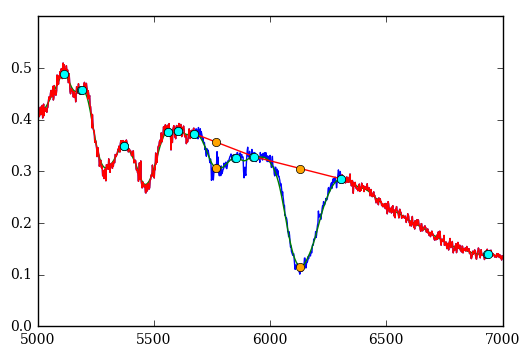

sn1998eg-19981024.15-fast.flm 1.14 0.259820986794 Check:  0.003 30.2624745063 32.3663049312
0.34501848881 10048.1333752


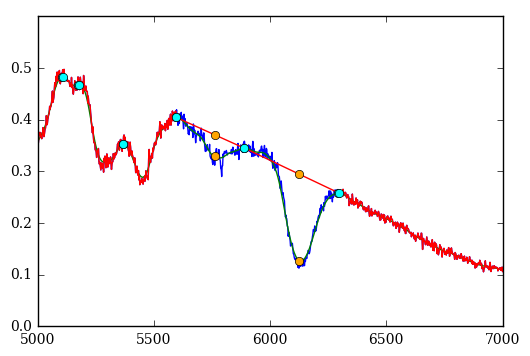

sn1998V-19980319.51-fast.flm 0.99 0.25078823716 Check:  0.003 29.3232071099 30.4884281143
0.319361123102 4131.62701821


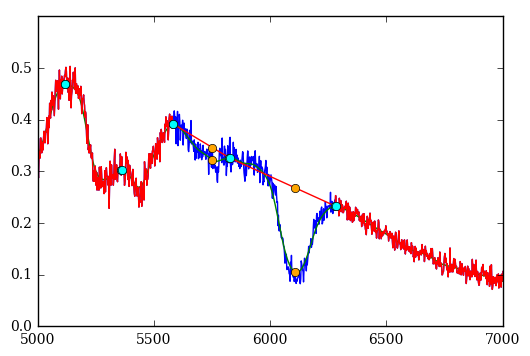

sn2000fa-20001215.36-fast.flm 1.0 0.145548757761 Check:  0.004 16.862359553 17.7996108846
0.390119952692 2821.97945455


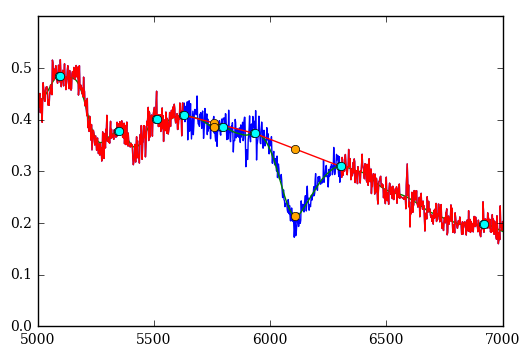

sn2001az-20010430.40-fast.flm 1.09 0.0681714487507 Check:  0.004 18.488048477 18.9991791822
0.377628034299 19886.1763762


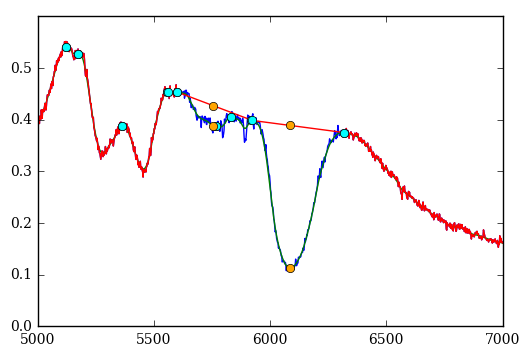

sn2001en-20011011.39-fast.flm 1.12 0.139401915446 Check:  0.002 45.9849268152 48.5119253032
0.347692566291 2031.99979681


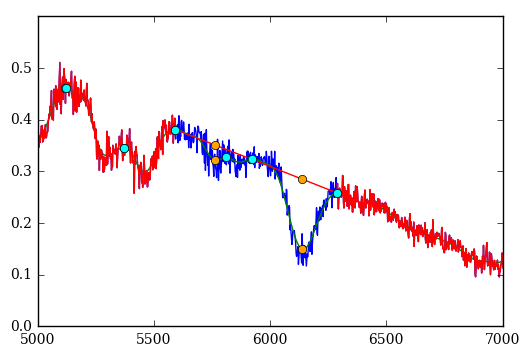

sn2002ck-20020502.46-fast.flm 1.08 0.210999995455 Check:  0.004 13.2806105152 14.0950318113
0.31689992003 363340.624328


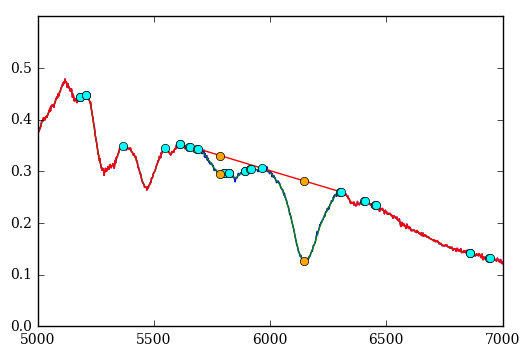

sn2002fk-20020929.44-fast.flm 1.13 0.2292210536 Check:  0.001 169.401776284 178.701687596
0.319354537211 1818.70446506


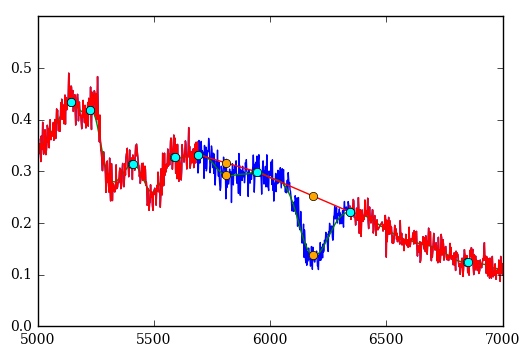

sn2002hu-20021113.25-fast.flm 1.05 0.209737010167 Check:  0.004 11.8674378183 12.5162474088
0.181074369028 481753.651756


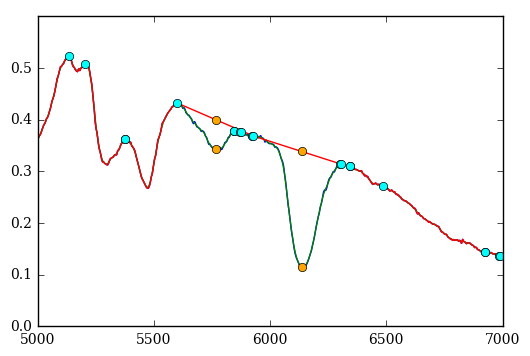

2003du_20030510_3203_10000_00.dat 1.07 0.255544286918 Check:  0.001 176.665517705 137.776154894
0.361489552413 13311.5054633


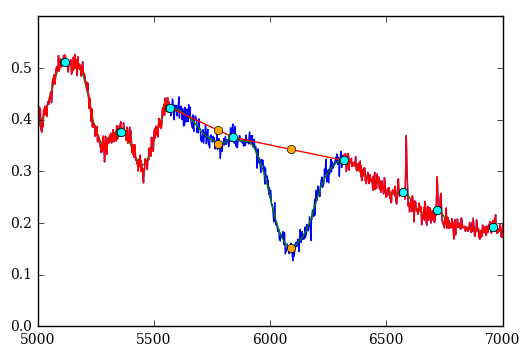

sn2003kc-20031203.49-fast.flm 1.14019986122 0.136397205758 Check:  0.003 38.971779777 40.1515779474
0.339650043338 4922.05501297


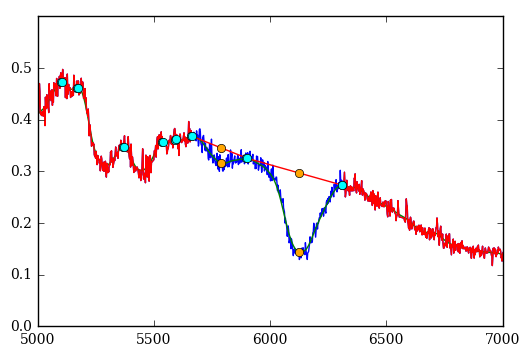

sn2004bg-20040411.39-fast.flm 1.05 0.193528789197 Check:  0.003 20.8073188444 22.1928311076
0.298729560633 2368.3468553


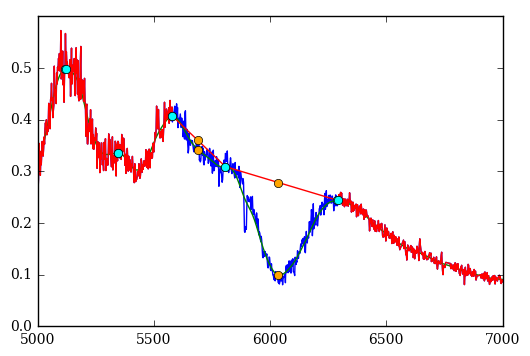

sn2005A-20050108.13-fast.flm 1.11 0.0996082704281 Check:  0.004 13.873247053 15.3296438272
0.189209114087 164868.416763


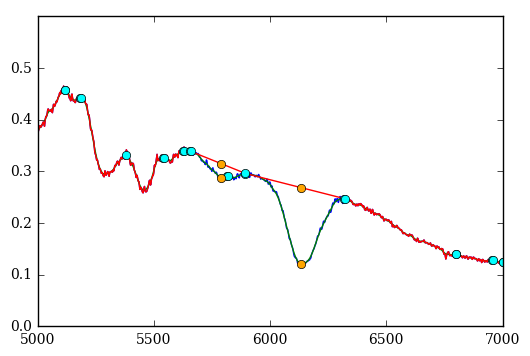

SN06ax_060330_b01_DUP_WF.dat 1.06 0.189112462352 Check:  0.0015 76.0047951682 75.0073923178
0.396942174405 4313.19239074


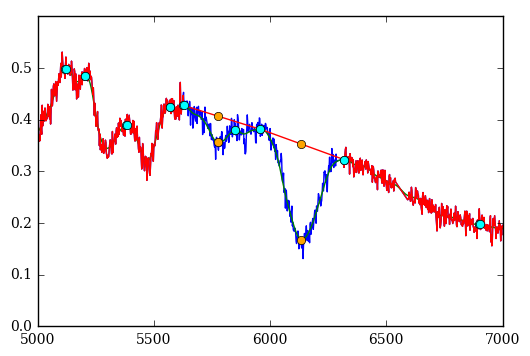

sn2006cf-20060519.25-fast.flm 1.08357495977 0.274748684506 Check:  0.003 24.1423888736 25.8361907292
0.381215775577 748.806146401


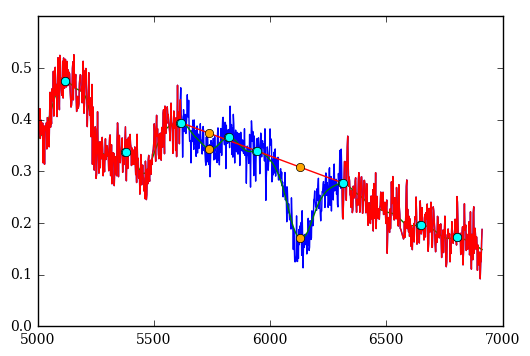

sn2007ae-20070225.54-fast.flm 0.98 0.222760848864 Check:  0.004 9.26962571067 9.7520371359
0.3397303521 12239.3307419


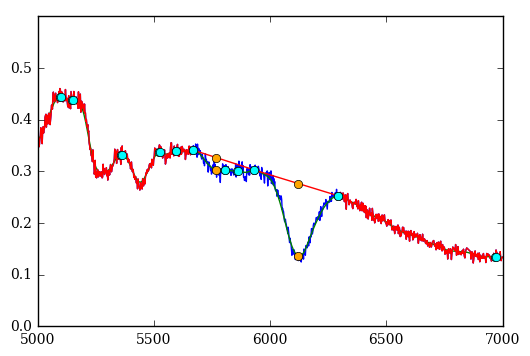

sn2007F-20070121.55-fast.flm 0.96 0.171707022454 Check:  0.003 32.6623867105 34.5212613972
0.100510491522 35513.4226264


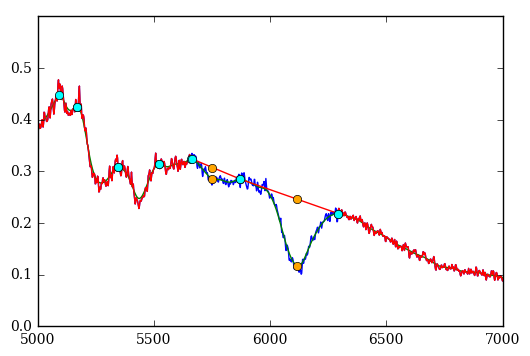

SN08bf_080328_g01_NTT_EM.dat 1.05 0.169513636257 Check:  0.003 20.5079637331 20.3785200773
0.232537121632 11243.7570485


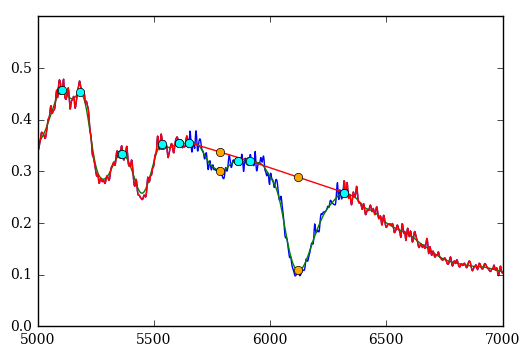

SN04ey_041025_b01_CLA_LD.dat 1.00821961936 0.204309651065 Check:  0.003 21.4148355064 23.7522435175
0.211630567717 40357.8778054


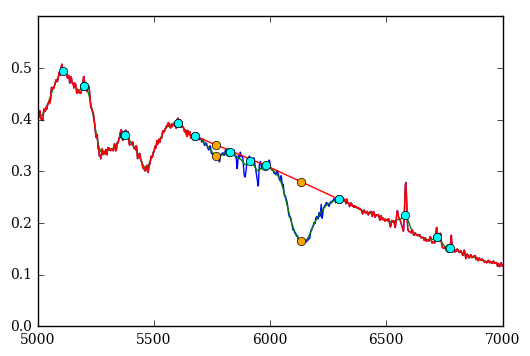

SN05bg_050412_b01_DUP_WF.dat 1.06633511992 0.19234566667 Check:  0.002 42.0940169494 38.7947571552
0.324097683601 8190.27151993


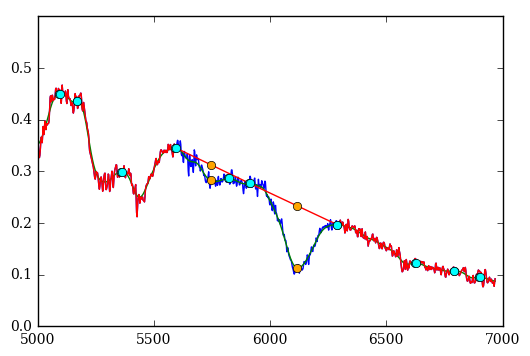

SN05hc_051024_b01_MGH_BC.dat 1.03 0.25219265016 Check:  0.003 25.8828957246 26.1895104645
0.422471803479 1518.40481057


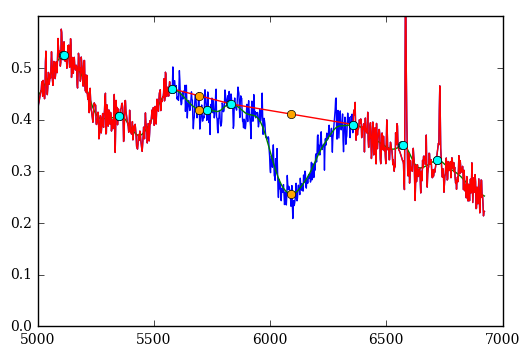

SN05ku_051125_b01_DUP_MS.dat 1.03987320294 0.172833769208 Check:  0.004 15.9890428723 16.998579527
0.313731462167 5987.6561309


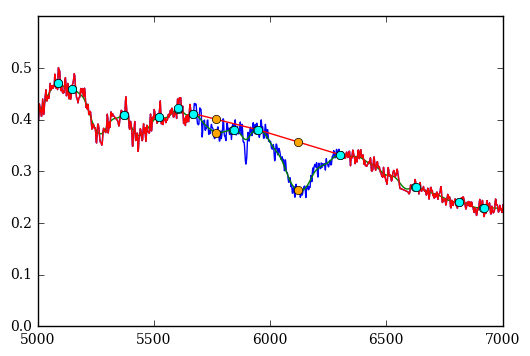

SN06hx_061010_b01_DUP_WF.dat 1.05273249926 0.275344083599 Check:  0.003 23.6878682483 25.9064594346
0.183591413772 6661.28734442


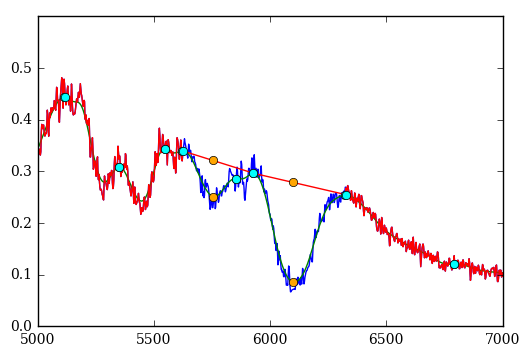

SN06os_061122_b01_DUP_WF.dat 1.07098749844 0.361790621804 Check:  0.004 12.8536902003 13.4035978951
0.212227296203 29658.4025283


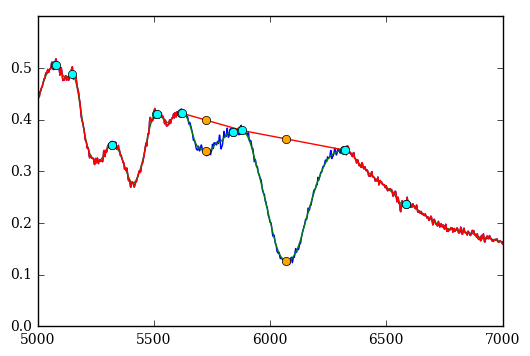

SN07as_070319_b01_DUP_BC.dat 1.11396538206 0.257353759595 Check:  0.002 41.8714709651 45.1748178915
0.206894712526 38370.9821861


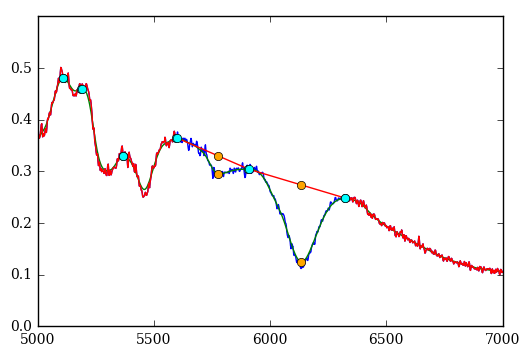

SN08bq_080407_b01_DUP_WF.dat 1.00130644601 0.232720775053 Check:  0.003 35.3880739351 37.4970528421
0.197325424989 432962.554629


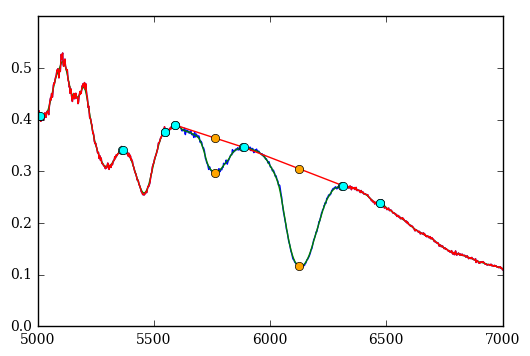

SN08hv_081218_b02_CLA_LD.dat 1.13369017264 0.356013114787 Check:  0.0015 85.6875728838 82.3632762909
0.134161760541 34.7266179653
Could not find maximum in a specified range!
sn1980n-19801211.724-iue.flm 1.13157052606 nan Check:  0.0045 1.70828874926 1.22286925385
0.181697019306 69.7250144794
Could not find maximum in a specified range!
sn1981b-19810311.597-iue.flm 1.05664955847 nan Check:  0.0045 1.69254070137 1.61788881452
0.462734437711 27135.3523874
Could not find maximum in a specified range!
sn2001ba-20010508.791-hst.flm 1.03352873666 nan Check:  0.0015 84.013145238 80.7913883177
0.134227485893 505128.034432


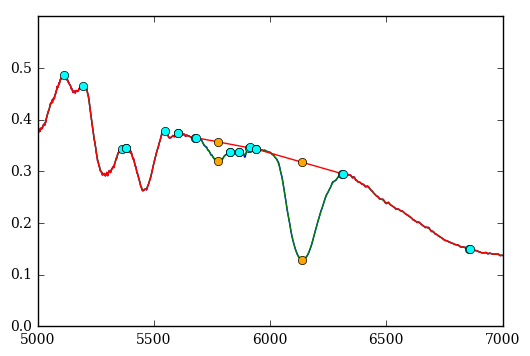

sn2011by-hst+lick.flm 1.14 0.193402344365 Check:  0.001 145.160507764 131.019382914
0.149826624756 609547.140369


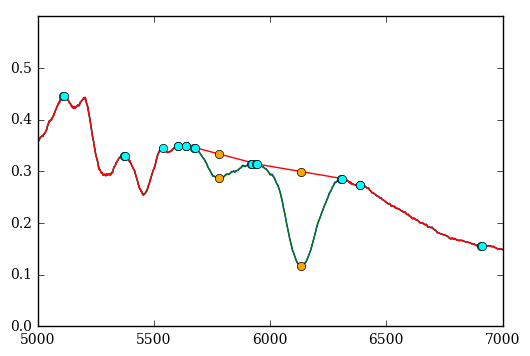

sn2011fe-visit4-hst.flm 1.1 0.258727352692 Check:  0.001 157.758697355 154.828176932
2
0.111611405935 221779.36349


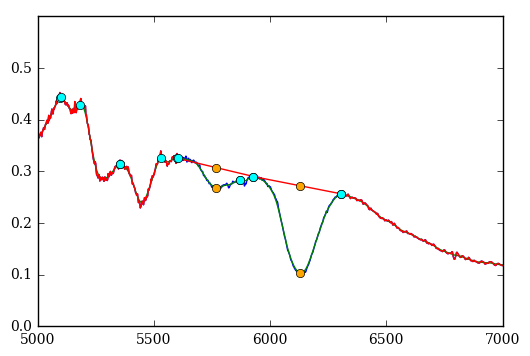

sn1995e-19950224-uoi2.flm 1.16 0.231198384223 Check:  0.002 57.1703862234 54.3574723707
0.192853686123 57986.1004748


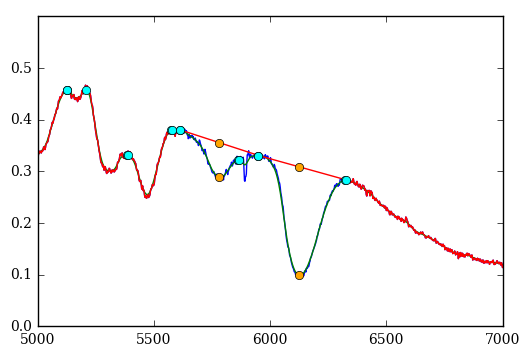

sn1997y-19970209-uohp.flm 1.15 0.319355831107 Check:  0.002 53.4636542865 48.8902404513
0.127990597897 635687.18302


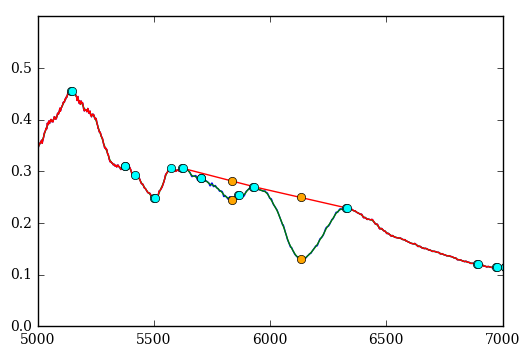

sn1999ac-19990312-ui-corrected.flm 1.23 0.302344169024 Check:  0.001 120.655521224 108.311328395
0.12719952389 499261.842976


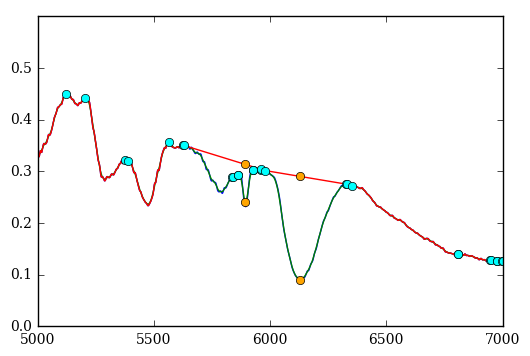

sn1999gd-19991205-uvoir.flm 1.18 0.364367701694 Check:  0.001 111.188307052 104.103767424
0.160332818911 132889.234287


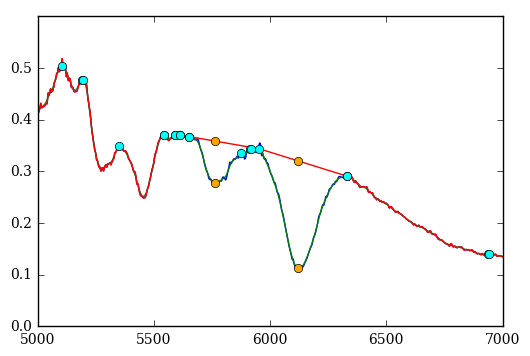

sn2002ha-20021102-ui-corrected.flm 1.22 0.389699845028 Check:  0.0015 75.936259872 68.7016172578
0.166241763436 6070.70443318


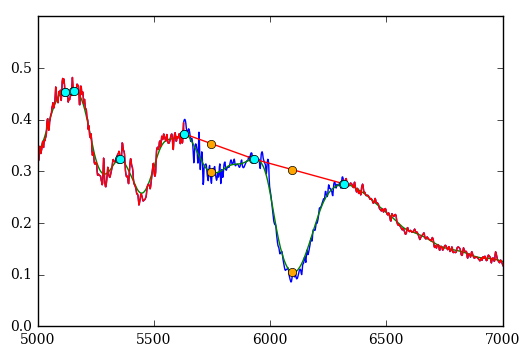

sn2003cq-20030408-ui.flm 1.2 0.27823315684 Check:  0.004 18.3634127947 16.3791643361
0.080526423842 130.974163662


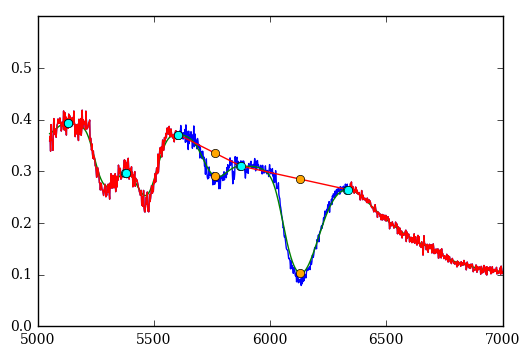

sn2005w-20050211.200-br.flm 1.22957865079 0.24634790455 Check:  0.0045 1.30140313403 0.954451152042
0.164677394291 58668.7385589


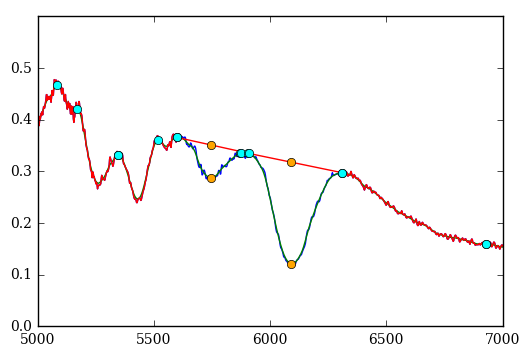

sn2006sr-20061220.097-ui.flm 1.24 0.325310870484 Check:  0.002 43.7174787146 40.9415266865
0.122918042142 74463.4604443


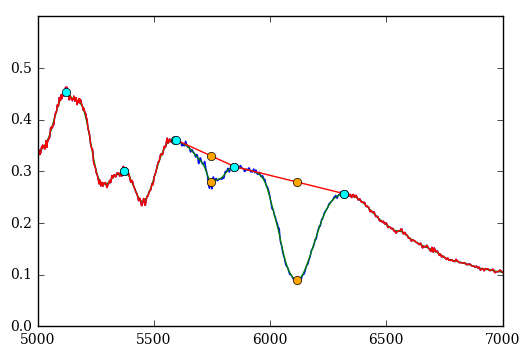

sn2007co-20070614.468-ui-corrected.flm 1.16 0.264305034843 Check:  0.002 45.9716688301 42.830129588
0.308384340223 43773.3850402


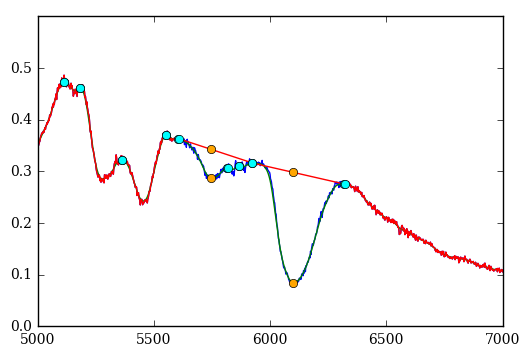

sn1998dh-19980804.36-fast.flm 1.17 0.257710537183 Check:  0.002 55.6127571283 58.7863076969
0.289287928179 78841.4665759


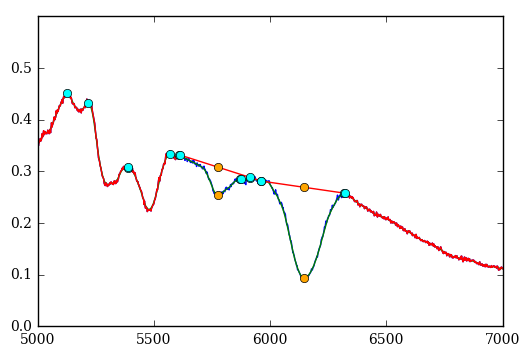

sn2002cr-20020515.28-fast.flm 1.19 0.309013073844 Check:  0.0015 72.8362758129 77.4070510996
0.313509808614 12068.4300967


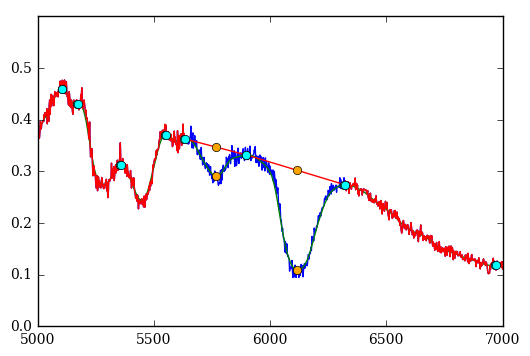

sn2002kf-20021231.34-fast.flm 1.2 0.29449347988 Check:  0.003 30.0361866302 31.9496419766
0.312784374366 9748.32391088


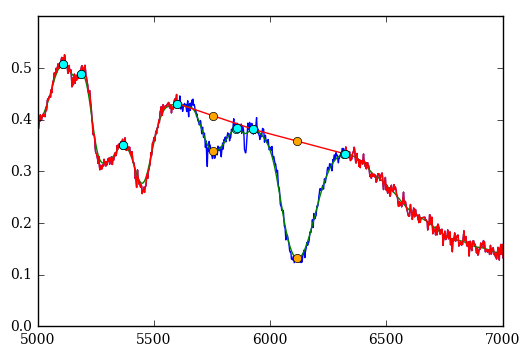

sn2003ch-20030329.11-mmt.flm 1.22 0.30275381575 Check:  0.003 28.142821495 27.4768924986
0.227710571653 3850.64369825


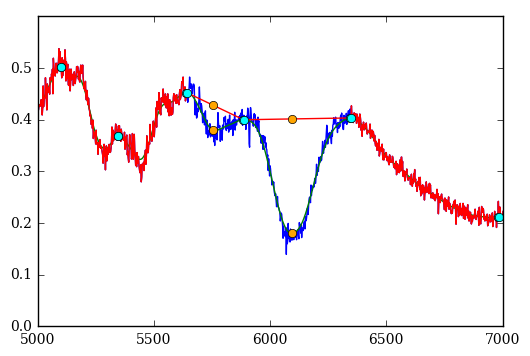

SN07jg_070922_b01_CLA_LD.dat 1.17 0.218861741868 Check:  0.004 17.0687196418 18.4667264992
0.312312783837 36001.5065228


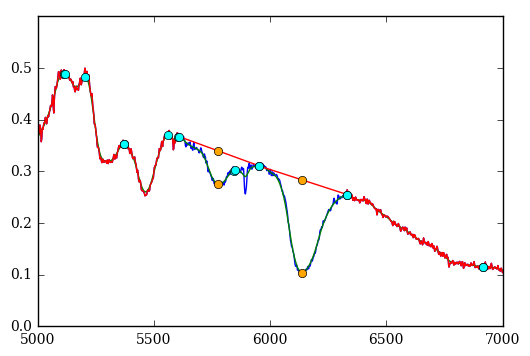

SN05kc_051125_b01_DUP_MS.dat 1.24 0.35750583678 Check:  0.002 51.8250596461 53.3221695027
0.160813018967 265993.384196


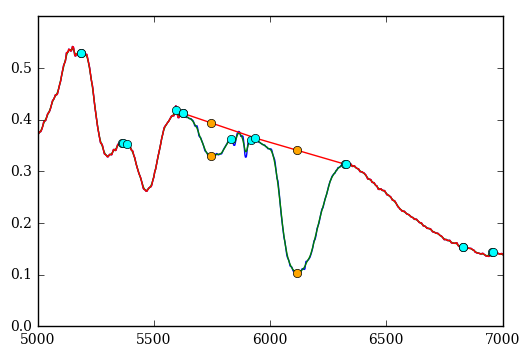

2002er_20020910_3209_9997_00.dat 1.23 0.270831432008 Check:  0.001 139.288769923 133.550781904
3
0.136728049886 264639.339217


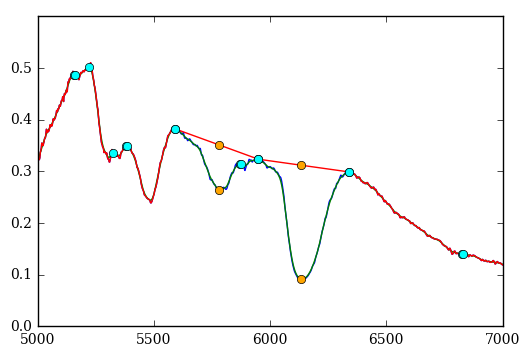

sn2001ep-20011020-ui-corrected.flm 1.3 0.392691985921 Check:  0.0015 81.4233736509 78.8007154147
0.21549254547 12277.9907106


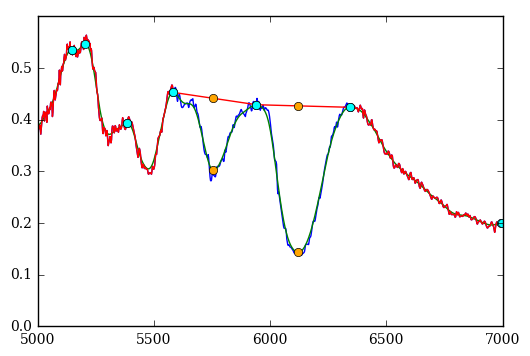

sn2004gs-20041217.447-ui-corrected.flm 1.41 0.492453562738 Check:  0.003 30.1756646281 26.4614100581
0.252640262032 194689.903524


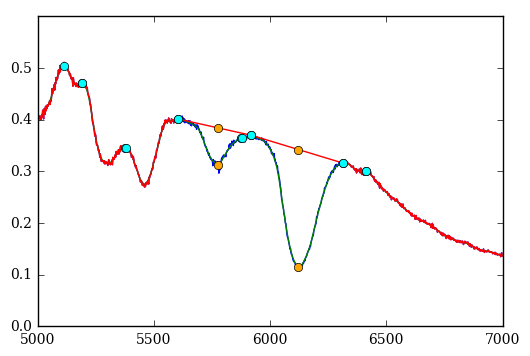

sn2005ki-20051202.649-deimos.flm 1.41 0.316652578696 Check:  0.0015 87.6229771159 86.6041247724
0.109995137934 35142.5261749


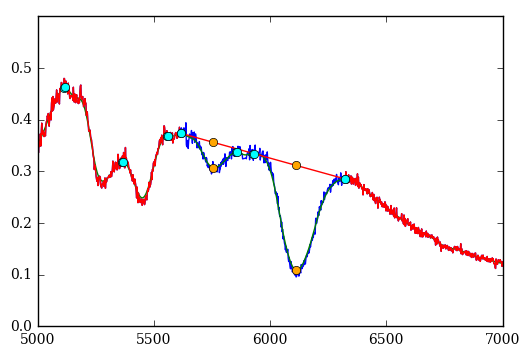

sn2005lz-20060101.381-deimos.flm 1.34 0.241358183964 Check:  0.003 25.7864018708 25.0623713149
0.128034983896 442459.096248


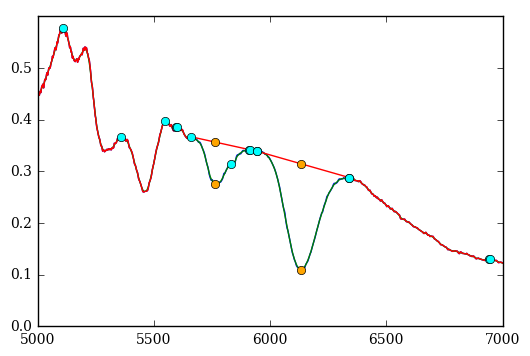

sn2006d-20060124.435-ui.flm 1.35 0.396484763487 Check:  0.001 113.25651542 109.17758021
0.168306701302 142242.323927


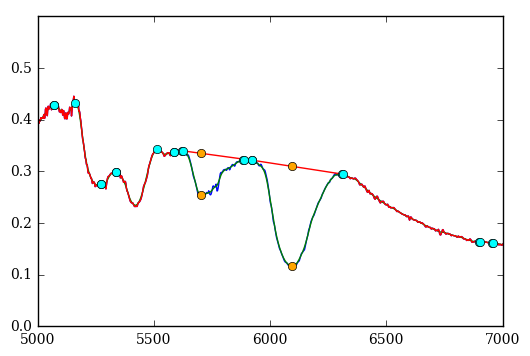

sn2006ej-20060824.430-ui.flm 1.26659174257 0.420632327115 Check:  0.0015 70.7104988599 64.7744839498
0.0716907800285 271817.42527


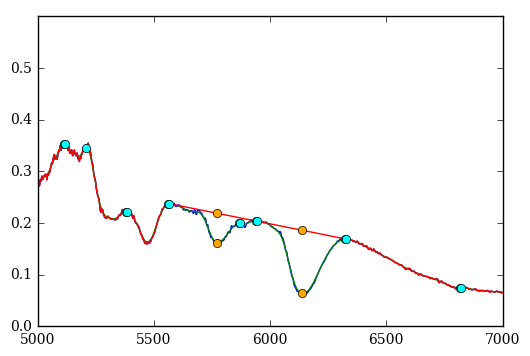

sn2007bc-20070410.323-ui-corrected.flm 1.37 0.464700448438 Check:  0.002 49.644834977 46.7404930151
0.247199468807 133675.310079


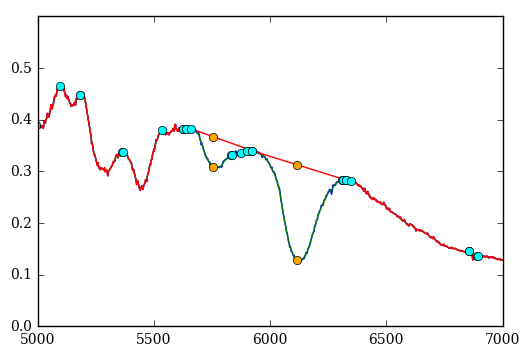

1994D_19940319_3402_9132_00.dat 1.37 0.318016988673 Check:  0.001 101.093824808 108.011111518
0.404086541252 2238.74715247


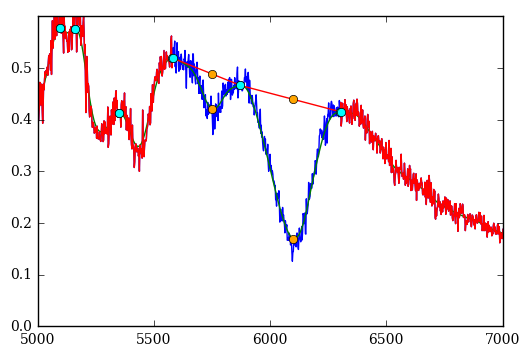

sn1994M-19940504.15-fast.flm 1.26 0.250321564516 Check:  0.004 13.9958814232 13.8634591514
0.125514168694 1184193.30821


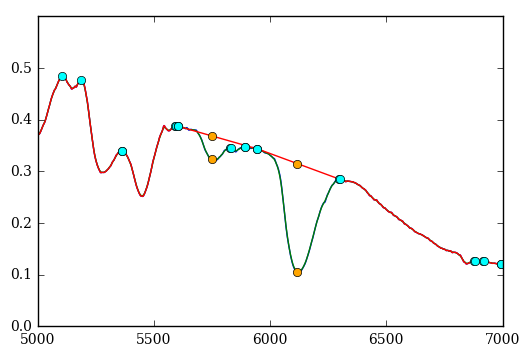

1996X_19960419_3077_10669_00.dat 1.26 0.217467636586 Check:  0.001 207.036128657 162.07865659
0.33831551709 1108.91500706


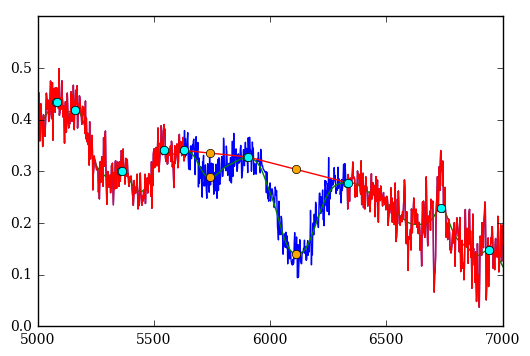

sn1998dx-19980914.18-fast.flm 1.32 0.286070071535 Check:  0.004 10.5421236452 10.9950820118
0.394278691309 8831.38927491


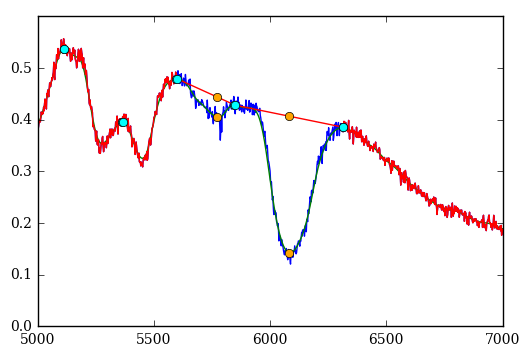

sn1998ef-19981029.31-fast.flm 1.27 0.148701099789 Check:  0.003 33.0091476762 34.6307150194
0.346787643164 4702.37668133


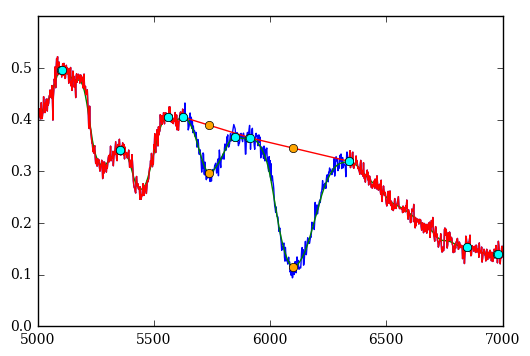

sn1999cc-19990516.34-fast.flm 1.35 0.398345546622 Check:  0.003 21.7701503521 23.2200876346
0.342664315057 1658.63299751


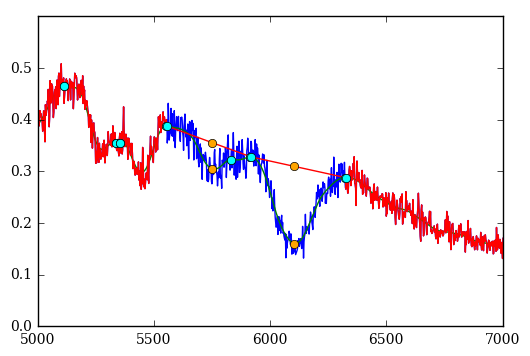

sn2002G-20020122.52-fast.flm 1.25 0.337930134024 Check:  0.004 12.0740330417 12.2289718425
0.18415619229 31784.9602686


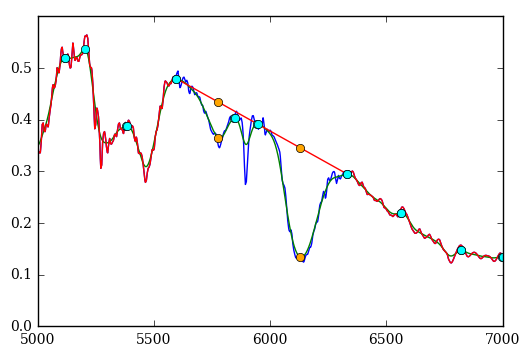

2003cg_20030401_3650_9347_00.dat 1.26 0.326642191264 Check:  0.003 26.7599927136 24.9222303011
0.368655240459 1106.10894026


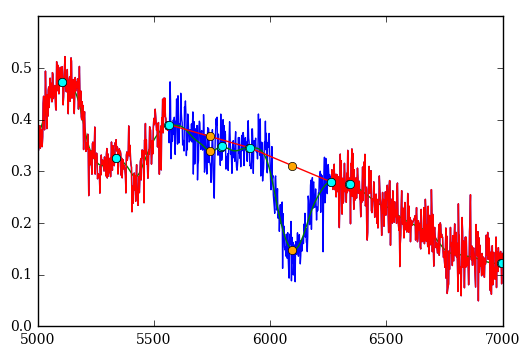

sn2003ic-20030921.36-fast.flm 1.30686535341 0.179247758245 Check:  0.004 11.407827594 11.8898809655
0.354488696813 23593.1326017


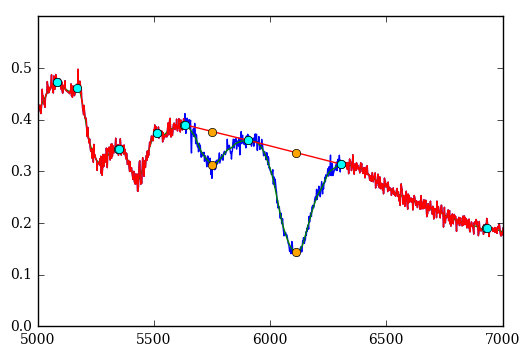

sn2003it-20031020.23-fast.flm 1.36 0.338379642541 Check:  0.002 48.6239163495 50.6148539568
0.271119934954 4362.81988505


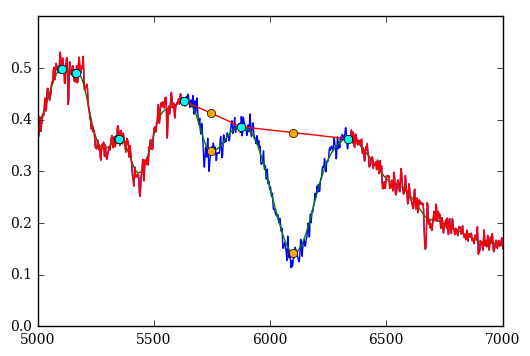

SN04ef_040914_b01_DUP_WF.dat 1.39 0.312321156164 Check:  0.004 17.3943925751 16.5464364119
0.315619910101 8096.72416512


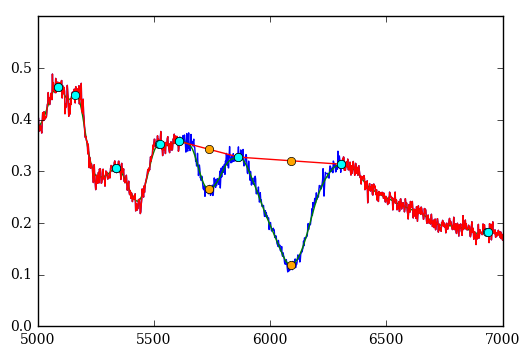

sn2005am-20050303.30-fast.flm 1.3 0.386512346219 Check:  0.003 27.1100082303 28.0974830128
0.206378533311 20820.0969713


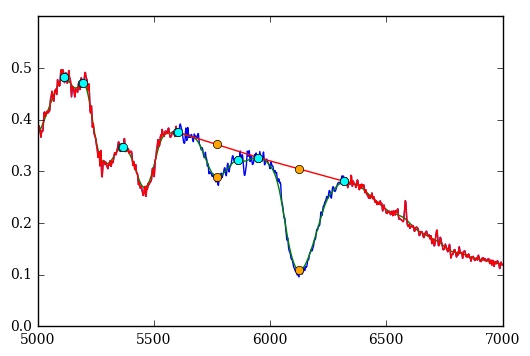

SN05bo_050418_b01_DUP_WF.dat 1.28 0.324506868044 Check:  0.003 28.2051121583 28.9716440857
0.382094346452 4246.61587595


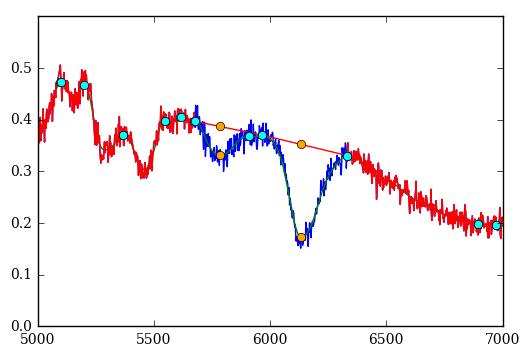

sn2006az-20060331.37-fast.flm 1.29 0.312500343476 Check:  0.003 23.4825642844 24.2229269357
0.232817553251 24281.0125532


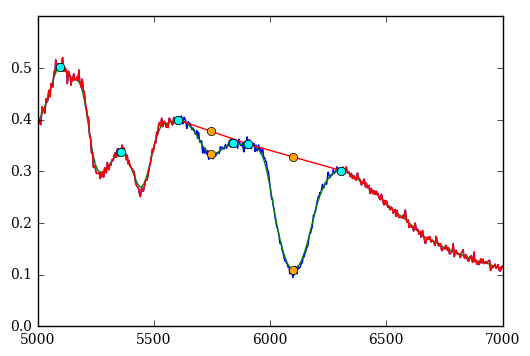

SN07bd_070417_b01_DUP_WF.dat 1.3 0.206013200203 Check:  0.003 33.3791043559 33.3833994931
0.339114595503 4429.63795663


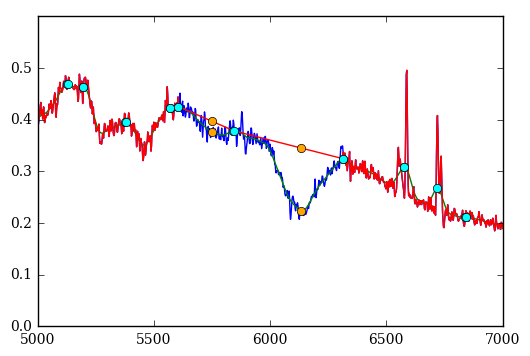

SN06fw_060927_b01_DUP_WF.dat 1.28774437183 0.168660689336 Check:  0.003 20.9677941077 18.788086689
0.153874163137 570.279212216
Could not find maximum in a specified range!
sn1992a-19920121.574-iue.flm 1.39953907584 nan Check:  0.004 5.51237057019 2.86022173774
4
0.173264254089 97884.1770325


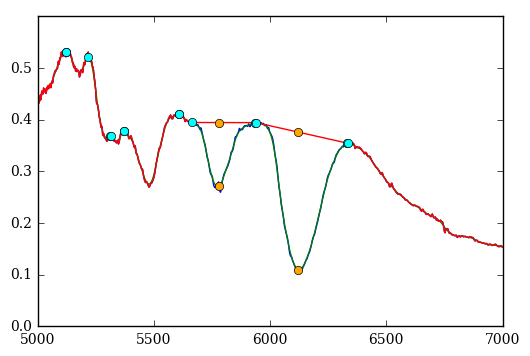

sn2000dk-20000926-ui-corrected.flm 1.62 0.461587616301 Check:  0.0015 67.3795955254 60.7007922387
0.313802639739 192092.712379


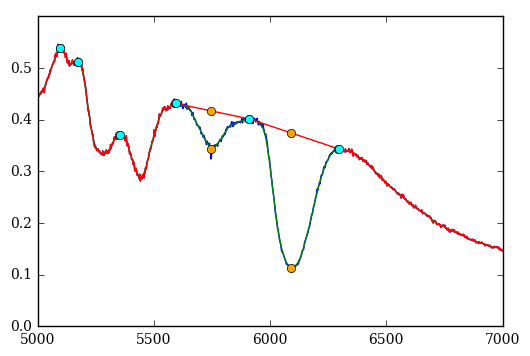

sn2002he-20021108-br.flm 1.44 0.285496662644 Check:  0.0015 96.6428616639 95.6520965706
0.202814352442 12767.6388799


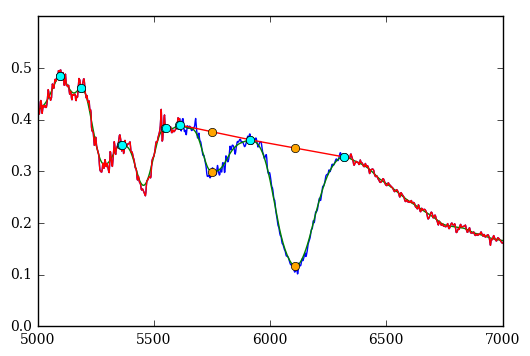

sn2003U-20030204-ui.flm 1.46 0.339060438689 Check:  0.003 31.0706940397 30.1795934023
0.248582116962 1388.06521086


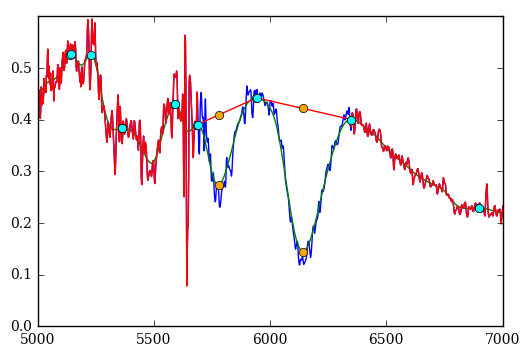

sn2006gt-20060925.348-ui.flm 1.66 0.489594822785 Check:  0.004 13.3227074084 12.2922114364
0.146308752296 127752.168409


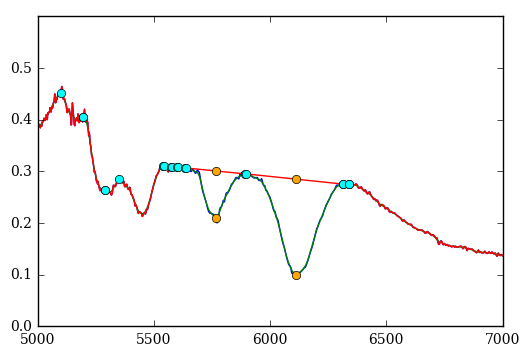

sn2006kf-20061030.385-ui.flm 1.55 0.490525034771 Check:  0.0015 60.6845217547 58.4890854823
0.176554738161 35293.1647677


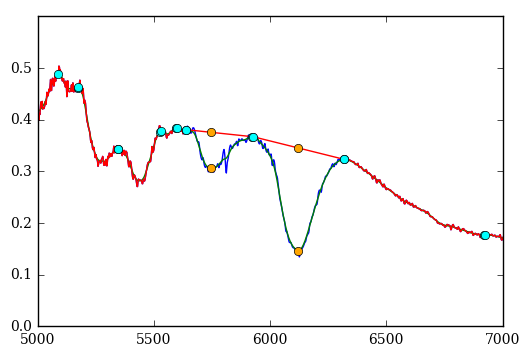

sn2006n-20060123.286-ui.flm 1.5 0.350847770712 Check:  0.002 43.6620758539 39.9495937413
0.145437981466 55602.1069297


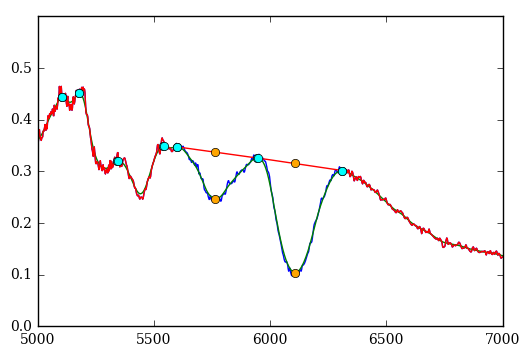

sn2007ci-20070524.264-ui-corrected.flm 1.6 0.425235722404 Check:  0.003 38.414619143 38.8321825778
0.281039662675 754341.368097


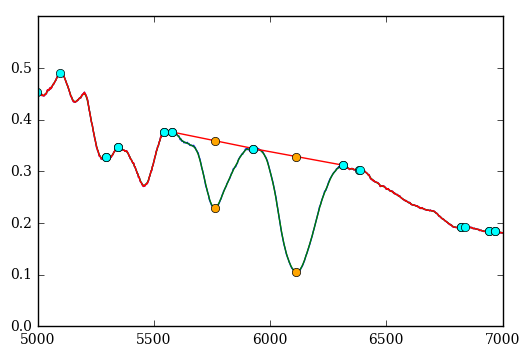

sn2007on-20071112.468-br.flm 1.64106422829 0.579037407011 Check:  0.001 231.60698374 236.523915492
0.345558242363 147.981789782


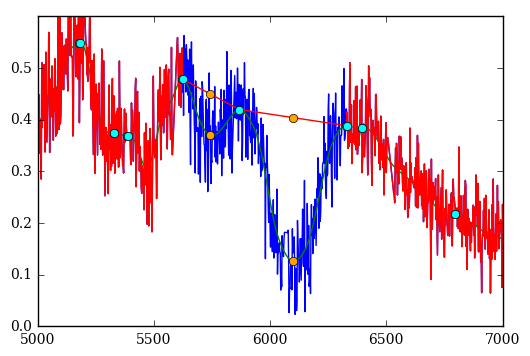

sn1994T-19940612.19-fast.flm 1.51 0.287114365106 Check:  0.0045 3.7330803909 3.67379617008
0.37172533836 14474.5742889


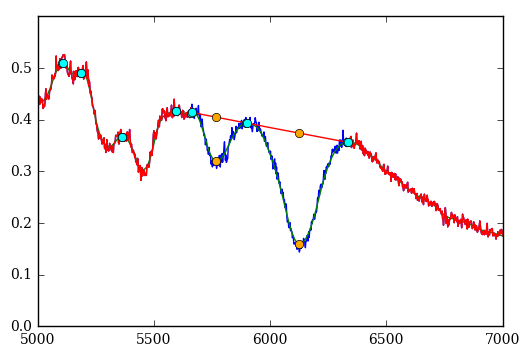

sn1999ej-19991030.28-fast.flm 1.48 0.397219223918 Check:  0.003 39.406420162 41.0765720322
0.427336123421 14254.416815


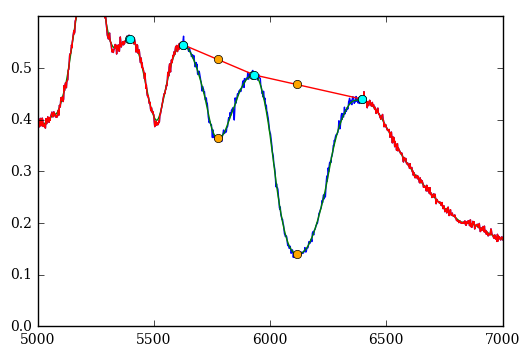

sn1999gh-19991206.53-fast.flm 1.69 0.463855664593 Check:  0.002 44.4293056661 46.1960647511
0.425148077465 6305.89058423


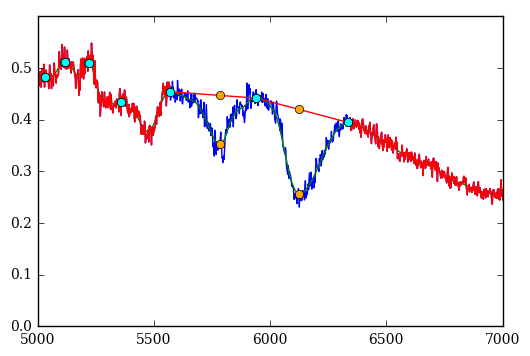

sn2002do-20020619.43-fast.flm 1.56 0.58134130716 Check:  0.003 28.6786772734 30.1768146952
0.337434543384 1502.79536757


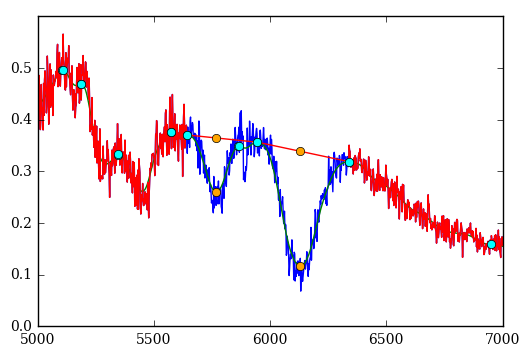

sn2002hw-20021114.10-fast.flm 1.44 0.471593533001 Check:  0.004 11.1342145953 11.3784076669
0.338083405393 1616.4234577


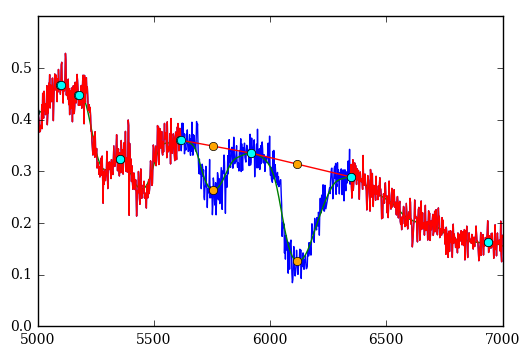

sn2003iv-20031019.38-fast.flm 1.65 0.452625943761 Check:  0.004 12.6584323707 13.0813617685
0.45147634471 3250.26458793


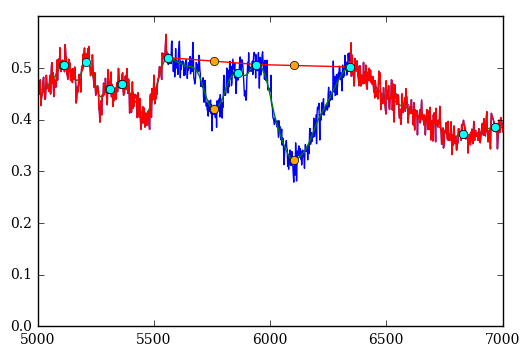

sn2005mc-20051227.37-fast.flm 1.63 0.505052415988 Check:  0.003 23.4773007174 25.5399137299
0.415423918002 2535.77125649


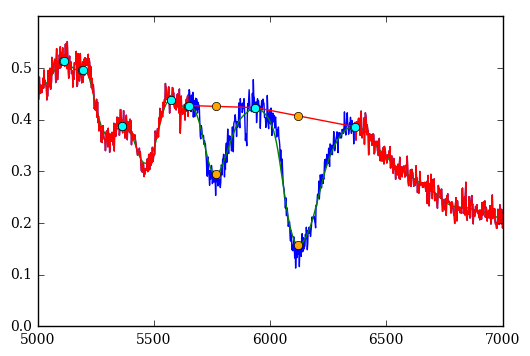

sn2006gj-20060920.43-fast.flm 1.48 0.526620819787 Check:  0.004 18.2542200529 19.2326318017
0.423338651971 1337.16230513


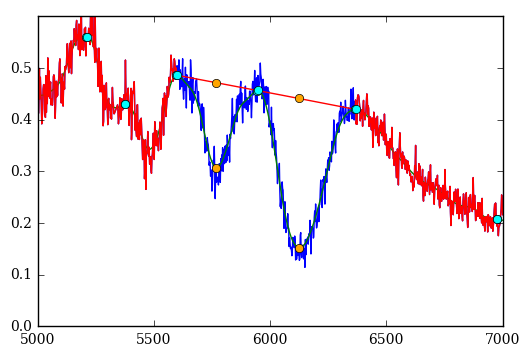

sn2007au-20070326.15-fast.flm 1.69 0.569285929691 Check:  0.004 14.4551062878 14.5619679101
5
0.262073293063 18985.8372479


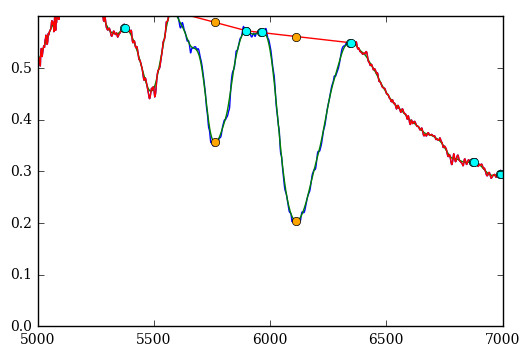

sn1999da-19990709-ui.flm 1.9 0.650029926262 Check:  0.002 44.8777259588 37.6739808022
0.270445172027 1393.5060088


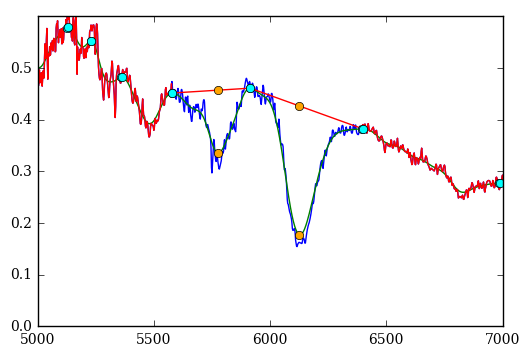

sn2006cs-20060605.335-ui.flm 1.9352579802 0.488493414387 Check:  0.004 16.488131718 10.5900759504
0.271916011018 55989.3503598


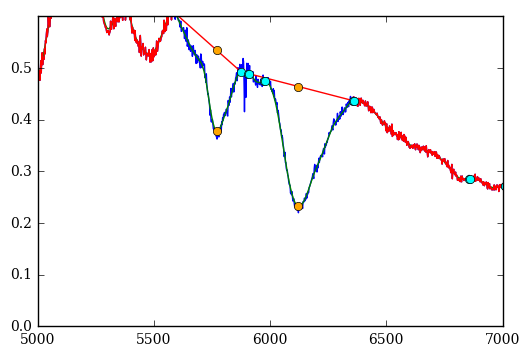

sn2007n-20070122.583-deimos.flm 1.874690474 0.679789155237 Check:  0.002 53.5508032379 54.7855706783
0.412561753745 5653.71501827


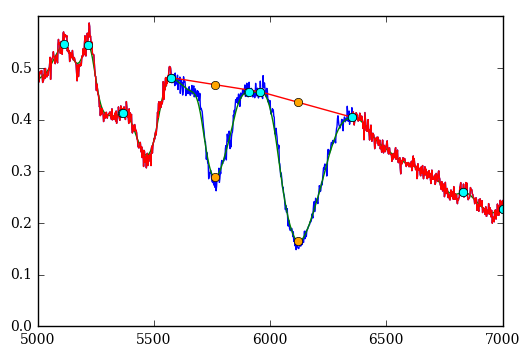

sn1998bp-19980430.47-fast.flm 1.79 0.667953612019 Check:  0.003 27.8093560716 28.741800308
0.487247487159 1009.78220027


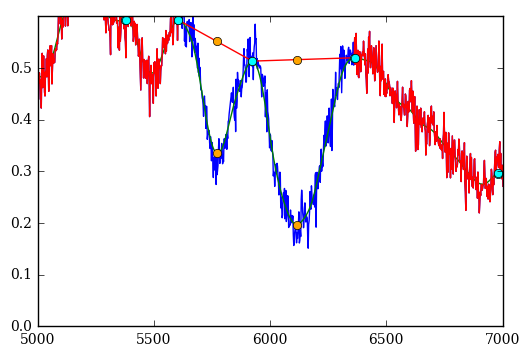

sn1998de-19980730.46-fast.flm 1.88 0.679030360418 Check:  0.004 13.4062477817 13.7655395418
0.319482498394 58877.4356896


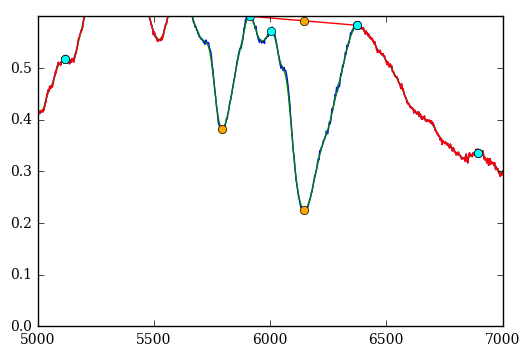

sn1999by-19990514.15-fast.flm 1.97 0.680634140558 Check:  0.0015 97.9157571889 96.6980224478
0.395057336308 788.16259038


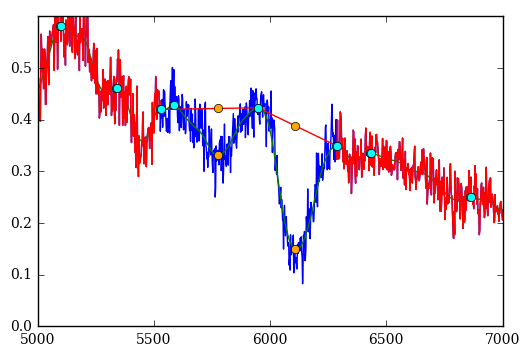

sn2002fb-20020907.51-fast.flm 1.77 0.378369924641 Check:  0.004 8.6958833589 8.90225730385
0.463776071543 23153.0945963


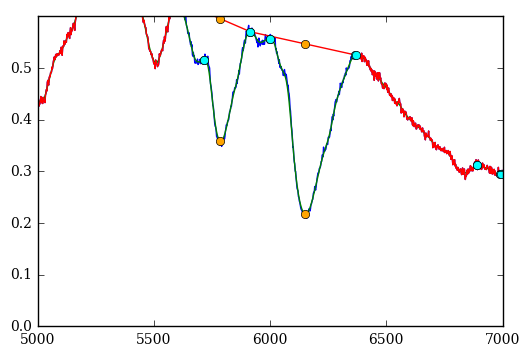

sn2005ke-20051125.30-fast.flm 1.82 0.719501414781 Check:  0.0015 70.8780328674 77.1936763643
0.481904376676 1827.63289089


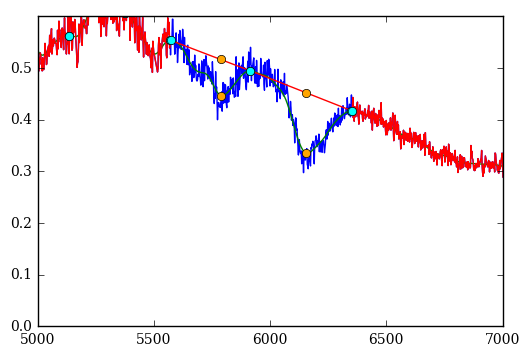

sn2007al-20070312.31-fast.flm 1.89 0.599808270196 Check:  0.004 19.958673159 22.287016872
0.236792529818 5009.96476602


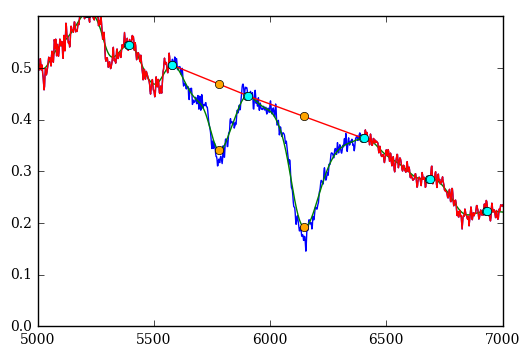

SN07ax_070326_b01_DUP_BC.dat 1.87 0.598090033383 Check:  0.004 19.5059243542 19.745349275
0.288165534431 5486.86341754


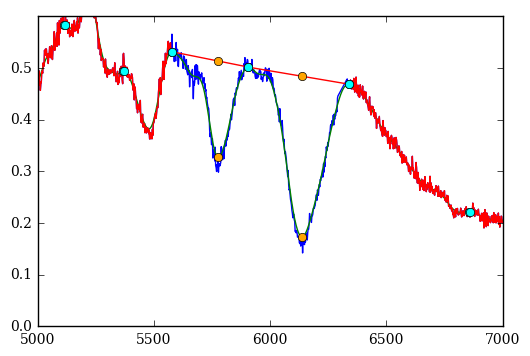

SN07ba_070409_b01_BAA_IM.dat 1.89 0.599424031436 Check:  0.003 20.8767979803 19.5777983695


In [32]:
all_dm15s_med = []
all_ratios_med = []
i=0
bad_measurements = ['sn2004dt-20040816.413-ui-corrected.flm','sn1997bp-19970407.42-mmt.flm','sn2003W-20030207.40-fast.flm',
                    'sn2005A-20050107.25-fast.flm','SN08ia_081210_r01_NTT_EF.dat','SN06mr_061109_r01_CLA_LD.dat',
                    'sn2006bt-20060428.425-ui.flm', 'sn1998es-19981125-ui-corrected.flm','sn1999aa-19990223-ui.flm',
                    'sn1999dq-19990911.46-fast.flm','sn2001V-20010301.47-fast.flm','sn2007S-20070209.30-fast.flm',
                    'SN08fp_080921_b01_DUP_WF.dat','sn2001bf-20010516-ui-corrected.flm','sn2006cz-20060626.304-ui.flm',
                    'sn1999cl-19990612.17-fast.flm','sn2005el-20050928.47-fast.flm']
for sn_arr in sn_arrays_med:
    print i
    dm15_bin = []
    ratio_bin = []
    for SN in sn_arr:
        if SN.dm15_source != None:
            dm15 = SN.dm15_source
        else:
            dm15 = SN.dm15_from_fits
        var = 1./SN.ivar
        if SN.source != 'swift_uv' and SN.filename not in bad_measurements:
            print np.median(SN.flux[SN.x1:SN.x2]), np.median(SN.ivar[SN.x1:SN.x2])
#             vexp, SNR = sa.find_vexp(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            vexp, SNR = sa.autosmooth(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=vexp, dm15 = dm15)
            print SN.filename, dm15, r, 'Check: ', vexp, SNR, SN.SNR
            dm15_bin.append(dm15)
            ratio_bin.append(r)
    all_dm15s_med.append(dm15_bin)
    all_ratios_med.append(ratio_bin)
    i+=1

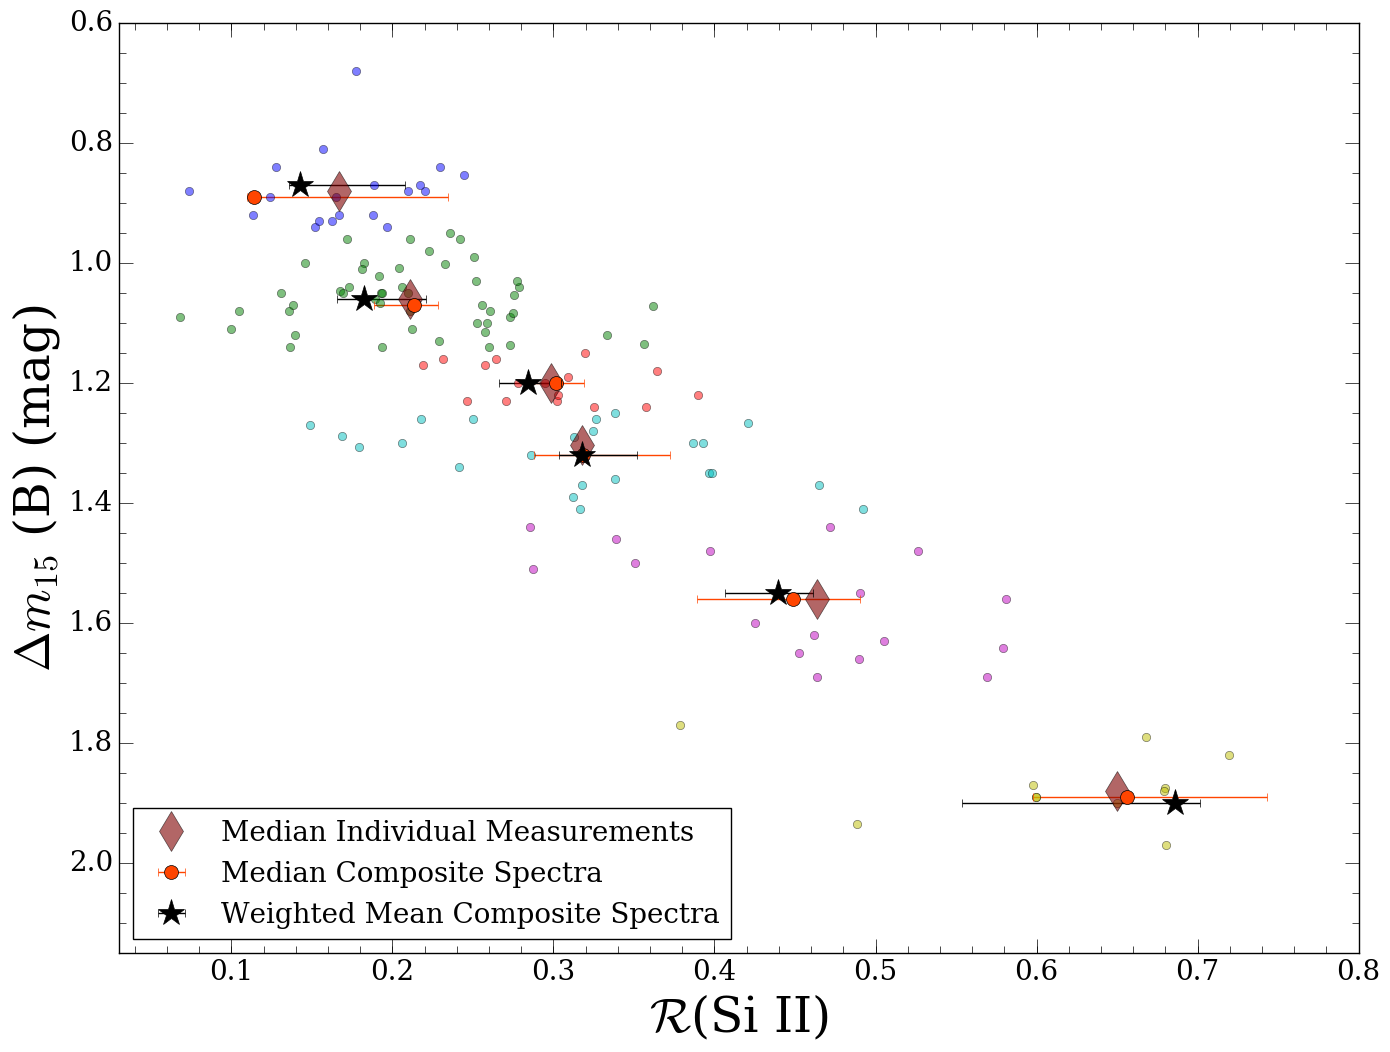

In [33]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 12, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\mathcal{R}$(Si II)', fontsize = 35)
plt.ylabel('$\Delta m_{15}$ (B) (mag)', fontsize = 35)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
dm15_bin_medians = []
ratio_bin_medians = []
for i in range(len(all_dm15s_med)):
    dm15_bin_medians.append(np.nanmedian(all_dm15s_med[i]))
    ratio_bin_medians.append(np.nanmedian(all_ratios_med[i]))
    plt.plot(np.asarray(all_ratios_med[i]), all_dm15s_med[i], 'o', alpha=.5)
plt.plot(ratio_bin_medians, dm15_bin_medians, 'd', markersize=20, alpha=.6, color = 'maroon', label='Median Individual Measurements')
plt.errorbar(si_ratios_med, dm15s_med, xerr=errors_med, color = 'orangered', fmt='o', markersize=10, label='Median Composite Spectra')
plt.errorbar(si_ratios_mean, dm15s_mean, xerr=errors_mean, fmt='k*', markersize=20, label='Weighted Mean Composite Spectra')
plt.gca().invert_yaxis()
plt.xlim([0.03,0.8])
plt.ylim([2.15, 0.6])
plt.legend(loc=3, fontsize = 20, numpoints=1)
# plt.savefig('../../../Paper_Drafts/main_composites_updated/si_ratio_wmedian.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/si_ratio_median.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [38]:
test_dm15s = []
test_ratios = []
for SN in sn_arrays_med[1]:
    if SN.dm15_source != None:
        dm15 = SN.dm15_source
    else:
        dm15 = SN.dm15_from_fits
    var = 1./SN.ivar
#     r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=.002, dm15 = dm15)
    print SN.filename, dm15, SN.phase

sn1998dk-19980831-ui.flm 1.05 -0.54
sn2001bf-20010516-ui-corrected.flm 0.99 1.22
sn2001da-20010716-ui-corrected.flm 1.12 -1.12
sn2001fe-20011115-ui.flm 1.0 -0.99
sn2002bo-20020322-ui-corrected.flm 1.08 -1.08
sn2002de-20020608.374-ui-corrected.flm 0.96 -0.32
sn2004dt-20040824-vis2-corrected.flm 1.14 1.38
sn2004fu-20041119-ui.flm 1.08 2.43
sn2005ag-20050212.596-br.flm 1.01576626674 0.52
sn2005cf-20050610.7-uvot.flm 1.1 -2.7
sn2005ms-20060106.400-ui.flm 0.977959604108 -1.88
sn2005na-20060105.335-ui.flm 1.09 0.03
sn2006bt-20060505.444-ui.flm 1.0 2.27
sn2006cz-20060620.266-ui.flm 1.00098460136 1.12
sn2006or-20061123.654-br.flm 1.0351558298 -2.79
sn2007a-20070113.208-br.flm 0.95 2.37
sn2007af-20070313.545-ui-corrected.flm 1.04 -1.25
sn2007bz-20070426.419-ui.flm 1.05 1.65
sn2007o-20070122.663-deimos.flm 1.08812276376 -0.33
sn1994ae-19941201.50-fast.flm 0.96 2.0
sn1996ab-19960522.37-fast.flm 1.01 1.47
sn1996bl-19961018.18-fast.flm 1.07 -2.32
sn1997dt-19971204.11-fast.flm 1.04 0.209999999999
sn

In [130]:
comp1 = comps_dm15_max_fewer_bins_med[0]
comp2 = comps_dm15_max_fewer_bins_mean[0]

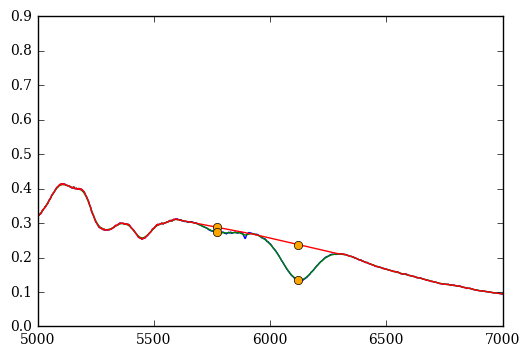

0.142816643794
done
done
done
done
done
done


In [131]:
r = sa.measure_si_ratio(comp2.wavelength[comp2.x1:comp2.x2], comp2.flux[comp2.x1:comp2.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_mean:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

0.189457511023


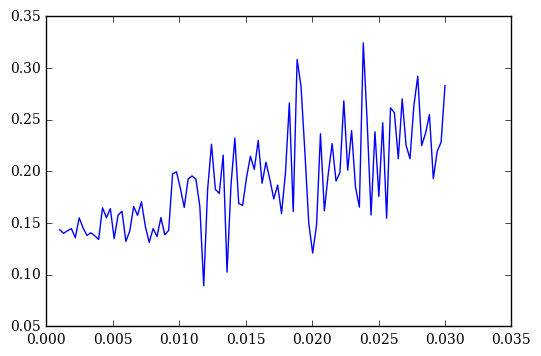

0.209406689513


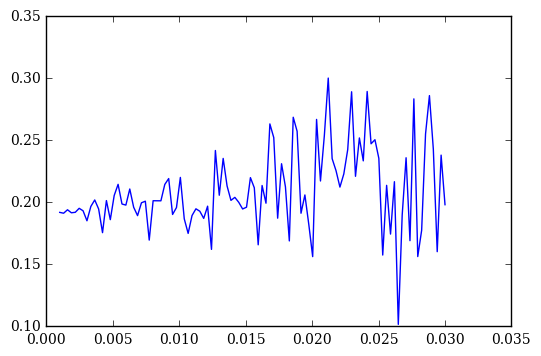

0.278637559562


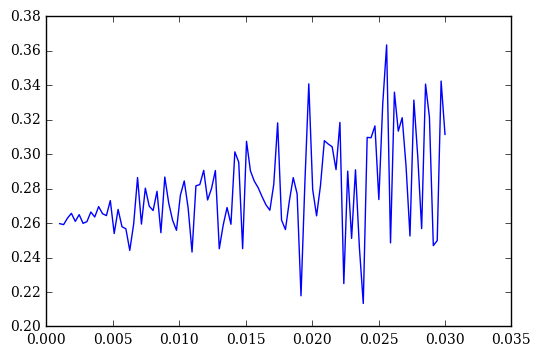

0.328324350482


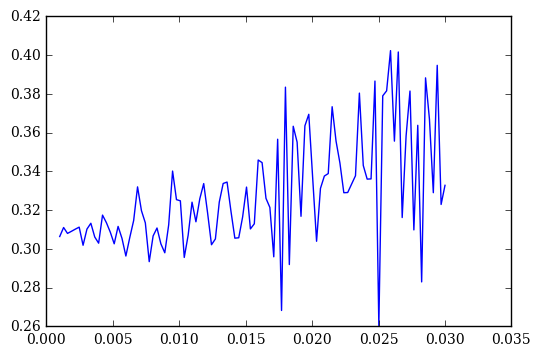

0.429638891641


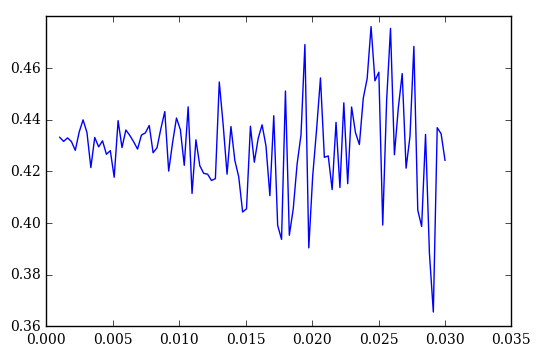

0.673744013832


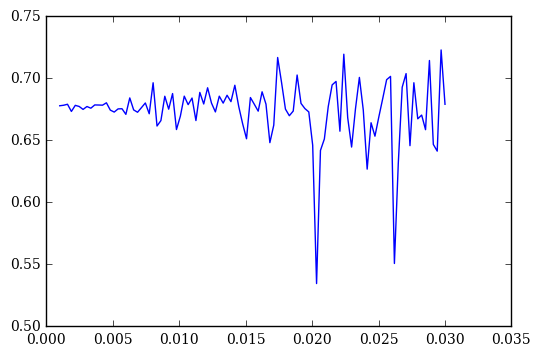

In [132]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()

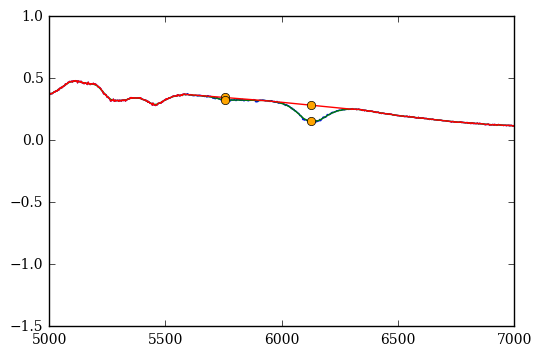

0.151973550521
done
done
done
done
done
done


In [133]:
r = sa.measure_si_ratio(comp1.wavelength[comp1.x1:comp1.x2], comp1.flux[comp1.x1:comp1.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_med:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

0.176726577757


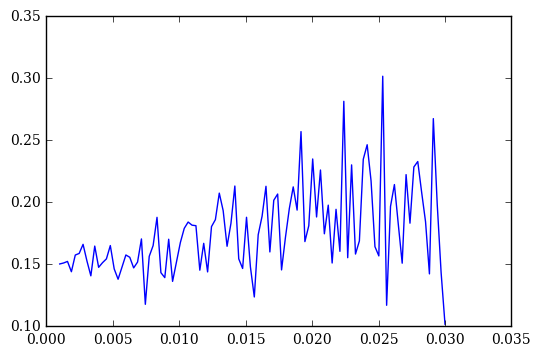

0.206528972512


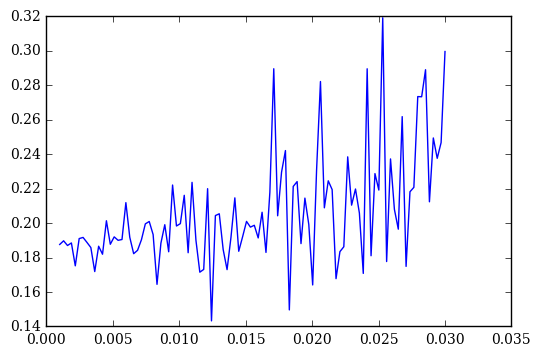

0.291981386018


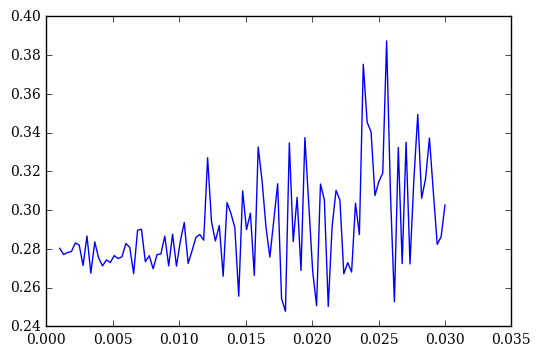

0.341507161476


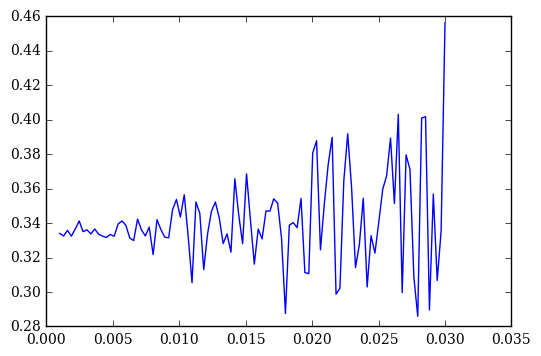

0.436933812483


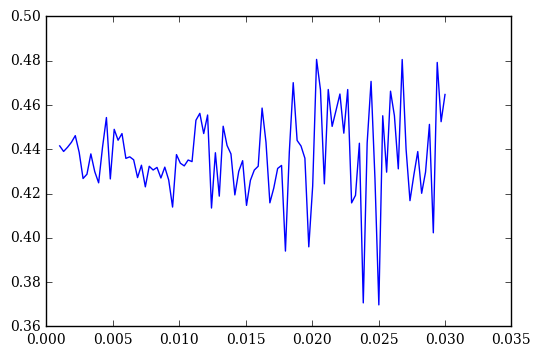

0.658354289286


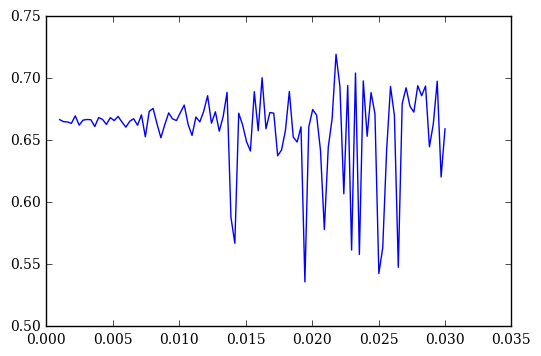

In [134]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()